  <div style="text-align: center;">

 # USED CAR ANALYSIS

![Used Car Photo](https://spn-sta.spinny.com/blog/20220228142243/ezgif.com-gif-maker-98-5.jpg)

</div>

                                  


 # Regression_Case_Study

**PROBLEM STATEMENT**

There is a huge demand of used cars in the Indian Market today. As sale of new car have slowed down in the recent past, the pre-owned car market has continued to grow over the past year and is larger than the new car market now. Consider this: In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones.

The goal of the case is as follows:

- The one major factor that holds anyone back while buying a used car is the price(target variable).You will be predicting the Price of used cars with the data collected from various sources and distributed across various locations in India.
- Compare different models and find out which one is the most suitable in this case in predicting the prices.

**Data Dictionary**

1. **Name:** The brand and model of the car.
2. **Location:** The location in which the car is being sold or is available for purchase.
3. **Year:** The year or edition of the model.
4. **Kilometers_Driven:** The total kilometers driven in the car by the previous owner(s) in KM.
5. **Fuel_Type:** The type of fuel used by the car.
6. **Transmission:** The type of transmission used by the car.
7. **Owner_Type:** Whether the ownership is Firsthand, Second hand or other.
8. **Mileage:** The standard mileage offered by the car company in kmpl or km/kg
9. **Engine:** The displacement volume of the engine in cc.
10. **Power:** The maximum power of the engine in bhp.
11. **Seats:** The number of seats in the car.
12. **New_Price:** The price of a new car of the same model.
13. **Price:** The price of the used car in INR Lakhs.



 ### Import Necessary Libraries



In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.metrics import (
    mean_squared_error,
    mean_absolute_error,
    accuracy_score,
    roc_auc_score,
    roc_curve,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay  
)

from sklearn import tree

**Purpose**
- We import essential libraries for data manipulation, visualization, and modeling.

 **Load the Dataset**



In [9]:
cars=pd.read_csv('Cars.csv')

**Purpose**
- Loading the used cars dataset for analysis.

 ###  Initial_Data_Overview



 **Shape of the Data**

In [13]:
cars.shape

(5961, 15)

  **Types of the Data** 

In [15]:
cars.dtypes

Name                  object
Location              object
Year                 float64
Kilometers_Driven    float64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Colour                object
Seats                float64
No. of Doors         float64
New_Price             object
Price                float64
dtype: object

 **Read the Data** 

In [17]:
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,New_Price,Price
0,Mahindra Scorpio,Pune,2012.0,99000.0,Diesel,Manual,Third,12.05 kmpl,2179 CC,120 bhp,Black/Silver,8.0,5.0,NaN,6.00
1,Maruti Baleno,Kochi,2018.0,18678.0,Petrol,Manual,First,21.1 kmpl,998 CC,100 bhp,Others,5.0,4.0,NaN,8.32
2,Mahindra Xylo,Bangalore,2013.0,197000.0,Diesel,Manual,First,11.68 kmpl,2498 CC,112 bhp,White,7.0,5.0,NaN,4.00
3,Hyundai Grand,Delhi,2014.0,45000.0,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,White,5.0,4.0,NaN,3.49
4,Toyota Innova,Delhi,2011.0,65000.0,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,Others,8.0,5.0,NaN,6.40


In [18]:
cars =cars[cars['Year'] >= 2000] 

- remove older data if resale of vehicles of tht year not allowed anymore

 **Check the Info**

In [21]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5953 entries, 0 to 5960
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5953 non-null   object 
 1   Location           5942 non-null   object 
 2   Year               5953 non-null   float64
 3   Kilometers_Driven  5945 non-null   float64
 4   Fuel_Type          5953 non-null   object 
 5   Transmission       5926 non-null   object 
 6   Owner_Type         5938 non-null   object 
 7   Mileage            5951 non-null   object 
 8   Engine             5936 non-null   object 
 9   Power              5922 non-null   object 
 10  Colour             5942 non-null   object 
 11  Seats              5948 non-null   float64
 12  No. of Doors       5952 non-null   float64
 13  New_Price          822 non-null    object 
 14  Price              5953 non-null   float64
dtypes: float64(5), object(10)
memory usage: 744.1+ KB


In [22]:
cars.shape

(5953, 15)

**Get the Summary Statistics**

In [24]:
cars.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,5953,211,Maruti Swift,343,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,5942,11,Mumbai,780,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,5953.0,NaN,NaN,NaN,2013.404334,3.209209,2000.0,2012.0,2014.0,2016.0,2019.0
Kilometers_Driven,5945.0,NaN,NaN,NaN,58683.024222,91762.574439,171.0,33915.0,53000.0,73000.0,6500000.0
Fuel_Type,5953,5,Diesel,3186,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,5926,2,Manual,4218,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,5938,4,First,4871,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,5951,439,18.9 kmpl,172,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,5936,142,1197 CC,606,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Power,5922,369,74 bhp,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 ## EDA 

**Null Values**

In [27]:
cars.isnull().sum()

Name                    0
Location               11
Year                    0
Kilometers_Driven       8
Fuel_Type               0
Transmission           27
Owner_Type             15
Mileage                 2
Engine                 17
Power                  31
Colour                 11
Seats                   5
No. of Doors            1
New_Price            5131
Price                   0
dtype: int64

**% Null values**

In [29]:
cars.isnull().sum()/cars.isnull().sum().sum()*100

Name                  0.000000
Location              0.209165
Year                  0.000000
Kilometers_Driven     0.152120
Fuel_Type             0.000000
Transmission          0.513406
Owner_Type            0.285225
Mileage               0.038030
Engine                0.323255
Power                 0.589466
Colour                0.209165
Seats                 0.095075
No. of Doors          0.019015
New_Price            97.566077
Price                 0.000000
dtype: float64

**Next Step**
- Since New_Price has over 97% Null values, we would drop this column for now

In [31]:
cars=cars.drop('New_Price',axis=1)

In [32]:
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price
0,Mahindra Scorpio,Pune,2012.0,99000.0,Diesel,Manual,Third,12.05 kmpl,2179 CC,120 bhp,Black/Silver,8.0,5.0,6.00
1,Maruti Baleno,Kochi,2018.0,18678.0,Petrol,Manual,First,21.1 kmpl,998 CC,100 bhp,Others,5.0,4.0,8.32
2,Mahindra Xylo,Bangalore,2013.0,197000.0,Diesel,Manual,First,11.68 kmpl,2498 CC,112 bhp,White,7.0,5.0,4.00
3,Hyundai Grand,Delhi,2014.0,45000.0,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,White,5.0,4.0,3.49
4,Toyota Innova,Delhi,2011.0,65000.0,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,Others,8.0,5.0,6.40


**Check for Duplicates**

In [34]:
cars.duplicated().sum()

2

In [35]:
cars.drop_duplicates(inplace=True)

**Check for Object Data Type**

In [37]:
cars.select_dtypes(include='object').head()

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour
0,Mahindra Scorpio,Pune,Diesel,Manual,Third,12.05 kmpl,2179 CC,120 bhp,Black/Silver
1,Maruti Baleno,Kochi,Petrol,Manual,First,21.1 kmpl,998 CC,100 bhp,Others
2,Mahindra Xylo,Bangalore,Diesel,Manual,First,11.68 kmpl,2498 CC,112 bhp,White
3,Hyundai Grand,Delhi,Diesel,Manual,First,24.0 kmpl,1120 CC,70 bhp,White
4,Toyota Innova,Delhi,Diesel,Manual,First,12.8 kmpl,2494 CC,102 bhp,Others


**Next Step**
&#8594; **It seems that the columns Mileage, Engine , Power needs to be cleaned and converted to Float/int dtype**

In [39]:
cars['Mileage'] = cars['Mileage'].str.replace(',','').str.replace('kmpl','').str.replace('km/kg','').astype('float')

In [40]:
cars['Engine'] = cars['Engine'].str.replace(',','').str.replace('CC','').astype('float')

In [41]:
cars['Power'] = cars['Power'].replace('null bhp', 0)
cars['Power'] = cars['Power'].str.replace(',','').str.replace('bhp','').astype('float')

In [42]:
cars.select_dtypes(include='object').head()

,Name,Location,Fuel_Type,Transmission,Owner_Type,Colour
0,Mahindra Scorpio,Pune,Diesel,Manual,Third,Black/Silver
1,Maruti Baleno,Kochi,Petrol,Manual,First,Others
2,Mahindra Xylo,Bangalore,Diesel,Manual,First,White
3,Hyundai Grand,Delhi,Diesel,Manual,First,White
4,Toyota Innova,Delhi,Diesel,Manual,First,Others


**Next Step** &#8594; **Create a new column 'Brand' & 'Model' which has the brand name of the Cars**

**Purpose**
- Brand (Mahindra): Strongly influences price due to brand reputation and resale value (luxury brands > mass-market).
- Model (Bolero): Captures model-specific popularity, features, and demand, which directly affect price.
- Both are high-impact categorical features; separating them improves model accuracy for prediction and allows better counting/analysis than full 'Name' string.



In [45]:
cars['Brand']=cars.Name.apply(lambda x:x.split(' ')[0])

In [46]:
cars.Brand.value_counts()

Brand
Maruti           1182
Hyundai          1100
Honda             599
Toyota            410
Mercedes-Benz     317
Volkswagen        315
Ford              298
Mahindra          272
BMW               267
Audi              236
Tata              184
Skoda             173
Renault           143
Chevrolet         113
Nissan             91
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               25
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Isuzu               1
Smart               1
Lamborghini         1
Bentley             1
Name: count, dtype: int64

**Observation** &#8594; 

- Brand Isuzu is available twice in different cases ('ISUZU', 'Isuzu'). To avoid this being considered as 2 different brands, correct to single format

In [48]:
cars['Brand'] = cars['Brand'].str.replace('ISUZU', 'Isuzu')

In [49]:
cars.Brand.value_counts()

Brand
Maruti           1182
Hyundai          1100
Honda             599
Toyota            410
Mercedes-Benz     317
Volkswagen        315
Ford              298
Mahindra          272
BMW               267
Audi              236
Tata              184
Skoda             173
Renault           143
Chevrolet         113
Nissan             91
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               25
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Isuzu               3
Force               3
Smart               1
Lamborghini         1
Bentley             1
Name: count, dtype: int64

**Next Step**&#8594; **Create a new column 'Model' which has the Model name of the Cars**

In [51]:
cars['Model']=cars.Name.apply(lambda x: ' '.join(x.split(' ')[1:]))

In [52]:
pd.options.display.max_rows=300
cars['Model'].value_counts().sort_index(ascending=True)

Model
1                     3
3                    98
5                    68
6                     7
7                    13
800                  12
A                     8
A-Star               17
A3                    4
A4                   78
A6                   49
A7                    3
A8                    2
Accent               18
Accord               26
Alto                142
Amaze               105
Ameo                 19
Aspire                4
Aveo                 14
Avventura             4
B                    12
BR-V                  3
BRV                   5
Baleno               62
Beat                 46
Beetle                1
Bolero               15
Bolt                  4
Boxster               1
Brio                 60
C-Class               3
CLA                  13
CLS-Class             1
CR-V                 26
Camry                11
Captiva               2
Captur                3
Cayenne               7
Cayman                2
Cedia                 2
Celerio   

In [53]:
pd.options.display.max_rows=300
cars['Model'].value_counts().sort_index(ascending=True)

Model
1                     3
3                    98
5                    68
6                     7
7                    13
800                  12
A                     8
A-Star               17
A3                    4
A4                   78
A6                   49
A7                    3
A8                    2
Accent               18
Accord               26
Alto                142
Amaze               105
Ameo                 19
Aspire                4
Aveo                 14
Avventura             4
B                    12
BR-V                  3
BRV                   5
Baleno               62
Beat                 46
Beetle                1
Bolero               15
Bolt                  4
Boxster               1
Brio                 60
C-Class               3
CLA                  13
CLS-Class             1
CR-V                 26
Camry                11
Captiva               2
Captur                3
Cayenne               7
Cayman                2
Cedia                 2
Celerio   

**Observation** &#8594; 

- Model Ecosport is available twice in different cases ('Ecosport', 'EcoSport'). To avoid this being considered as 2 different models, correct to single format

In [55]:
cars['Model'] = cars['Model'].str.replace('EcoSport', 'Ecosport')

In [56]:
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price,Brand,Model
0,Mahindra Scorpio,Pune,2012.0,99000.0,Diesel,Manual,Third,12.05,2179.0,120.0,Black/Silver,8.0,5.0,6.00,Mahindra,Scorpio
1,Maruti Baleno,Kochi,2018.0,18678.0,Petrol,Manual,First,21.10,998.0,100.0,Others,5.0,4.0,8.32,Maruti,Baleno
2,Mahindra Xylo,Bangalore,2013.0,197000.0,Diesel,Manual,First,11.68,2498.0,112.0,White,7.0,5.0,4.00,Mahindra,Xylo
3,Hyundai Grand,Delhi,2014.0,45000.0,Diesel,Manual,First,24.00,1120.0,70.0,White,5.0,4.0,3.49,Hyundai,Grand
4,Toyota Innova,Delhi,2011.0,65000.0,Diesel,Manual,First,12.80,2494.0,102.0,Others,8.0,5.0,6.40,Toyota,Innova


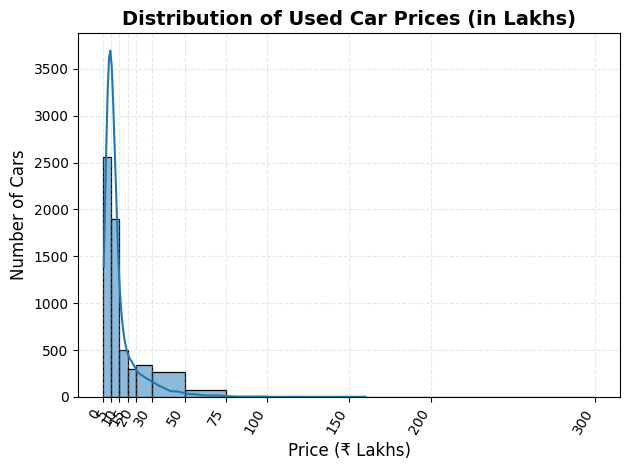

In [57]:
import warnings
warnings.filterwarnings("ignore")
custom_bins = [0, 5, 10, 15, 20, 30, 50, 75, 100, 150, 200, 300]  # 0-5, 5-10, 10-15, ... tak

plt.figure.figsize=(21,16)
    
sns.histplot(
    data=cars, 
    x='Price', 
    bins=custom_bins, 
    kde=True, 
    palette='magma',          
    edgecolor='black',        
    linewidth=0.9
)

# Title and labels
plt.title('Distribution of Used Car Prices (in Lakhs)', fontsize=14, fontweight='bold')
plt.xlabel('Price (₹ Lakhs)', fontsize=12)
plt.ylabel('Number of Cars', fontsize=12)


plt.xticks(custom_bins, rotation=60, ha='right') 

plt.grid(True, alpha=0.3, linestyle='--')


# plt.xscale('log')

plt.tight_layout()  # Better spacing
plt.savefig('price_histogram.png', dpi=400)  
plt.show()

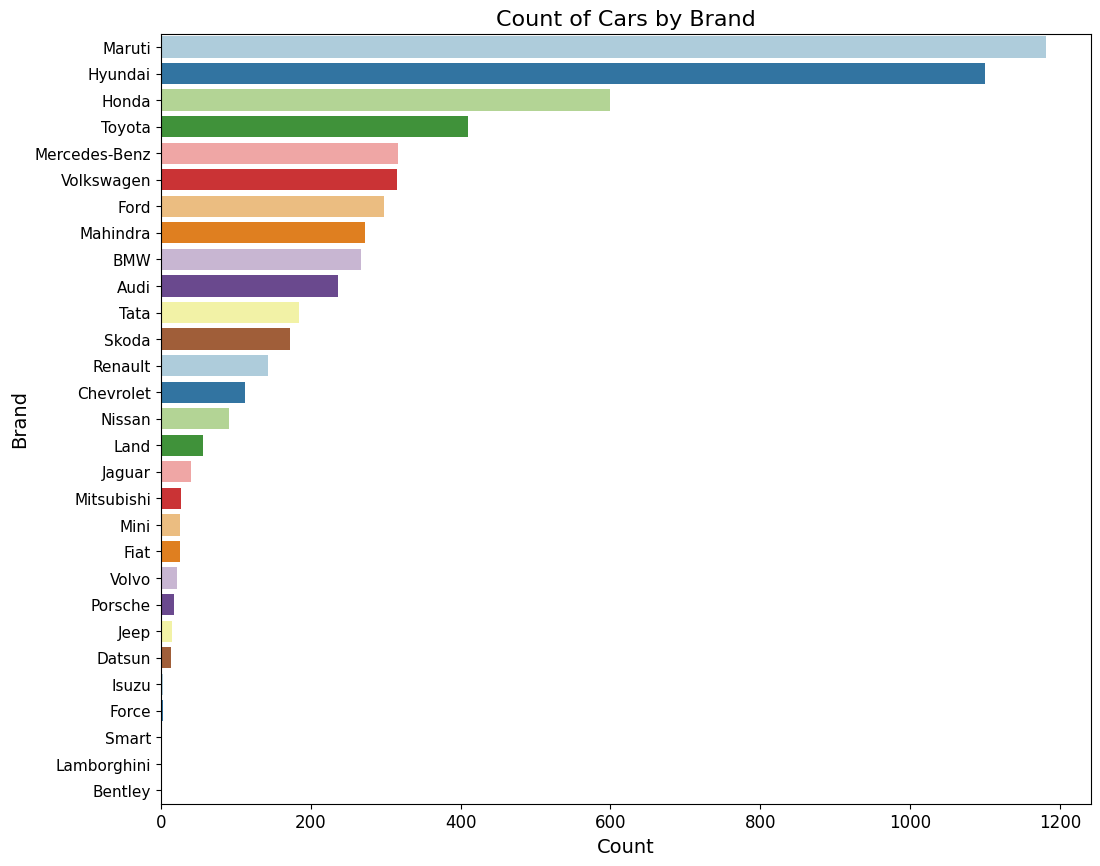

In [58]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))  # for increasing Hights

sns.countplot(
    y='Brand',
    data=cars,
    palette='Paired',     # bright & colors
    # palette='tab20'                   # alternative: 20 strong bright colors
    # palette='tab10'                   # alternative: 10 bright colors
    order=cars['Brand'].value_counts().index 
      # descending order
)

plt.title('Count of Cars by Brand', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Brand', fontsize=14)

# Font size adjust for clear visibility
plt.yticks(fontsize=11)
plt.xticks(fontsize=12)
plt.show()


**Observation**

  - The highest number of cars belong to Maruti, followed by Hyundai, then Honda, and Toyota comes next in terms of count.



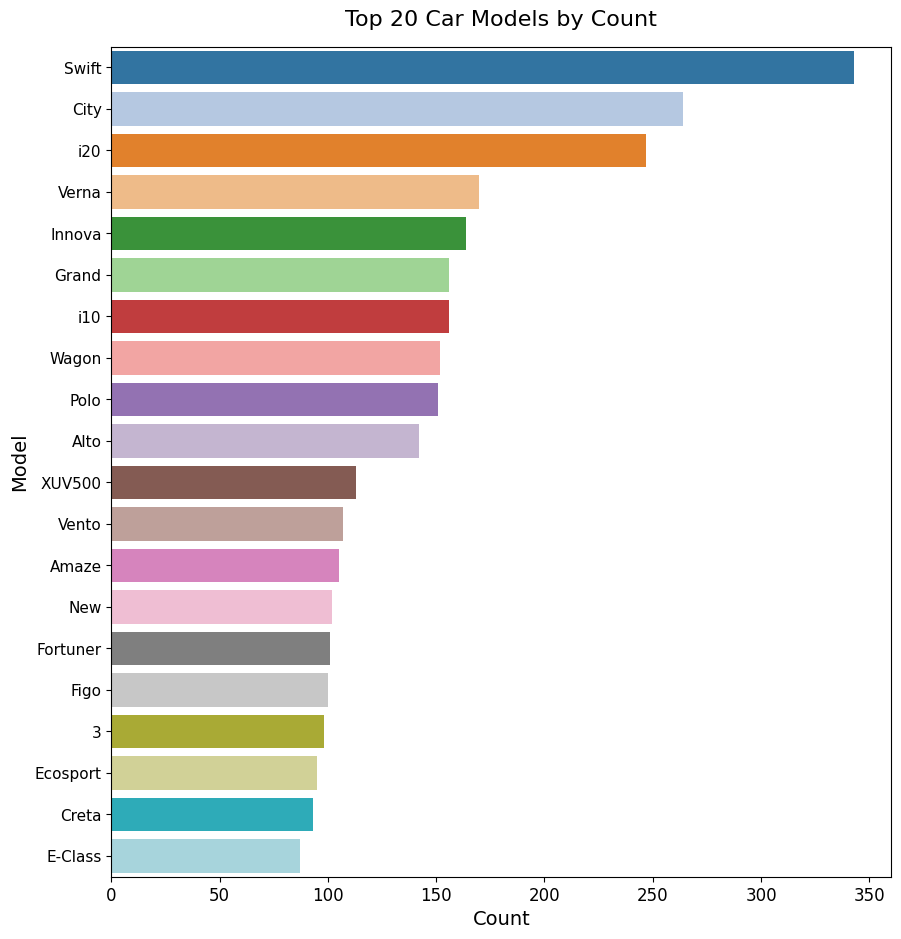

In [60]:
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 10))  

top_n = 20  
top_models = cars['Model'].value_counts().head(top_n)

sns.countplot(
    y='Model',
    data=cars, 
    palette='tab20',          
    order=top_models.index,             
)


plt.legend([],[], frameon=False)  

plt.title(f'Top {top_n} Car Models by Count', fontsize=16, pad=15)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Model', fontsize=14)

plt.yticks(fontsize=11)
plt.xticks(fontsize=12)

plt.subplots_adjust(top=0.93, bottom=0.1, left=0.3, right=0.95)  # better spacing

plt.show()

**Observation**
- The most common car model in the dataset is Maruti Suzuki Swift, followed by Honda City, then Hyundai i20, Hyundai Verna comes next, and Toyota Innova appears after that in terms of count.

 **Next Step**

- There is a car by the Model name 'New', let's check which car is it
- There is a car by the Model name '3', let's check which car is it


In [62]:
cars[cars['Model']=='New'].head(2) # so it is a Mercedes Benz

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price,Brand,Model
71,Mercedes-Benz New,Hyderabad,2012.0,86000.0,Diesel,Automatic,First,14.84,2143.0,170.0,White,5.0,4.0,19.0,Mercedes-Benz,New
279,Mercedes-Benz New,Jaipur,2009.0,116000.0,Diesel,Manual,Second,15.80,2148.0,170.0,White,5.0,4.0,8.5,Mercedes-Benz,New


In [63]:
cars[cars['Model']=='3'].head(2) # so it is a BMW

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price,Brand,Model
22,BMW 3,Mumbai,2014.0,48000.0,Diesel,Automatic,First,21.76,1995.0,190.0,Others,5.0,4.0,26.5,BMW,3
35,BMW 3,Chennai,2009.0,137000.0,Diesel,Automatic,Second,13.20,1995.0,170.0,Others,5.0,4.0,9.0,BMW,3


**Next Step**

&#8594; **Bin the cars as per average Price of the Brand**
- 'Budget_Friendly'
- 'Medium_Range'
- 'TopNotch_Cars'

In [65]:
cars.Price.describe()

count    5951.000000
mean        9.540492
std        11.219468
min         0.440000
25%         3.500000
50%         5.680000
75%        10.000000
max       160.000000
Name: Price, dtype: float64

In [66]:
#Binning the Car Companies based on avg prices of each car Company.
cars['Price'] = cars['Price'].astype('int')
cars_2 = cars.copy()
t = cars_2.groupby(['Brand'])['Price'].mean()
t

Brand
Audi              25.131356
BMW               24.823970
Bentley           59.000000
Chevrolet          2.451327
Datsun             2.538462
Fiat               2.800000
Force              9.333333
Ford               6.429530
Honda              4.946578
Hyundai            4.861818
Isuzu             14.666667
Jaguar            37.300000
Jeep              18.333333
Lamborghini      120.000000
Land              39.456140
Mahindra           7.610294
Maruti             4.074450
Mercedes-Benz     26.507886
Mini              26.538462
Mitsubishi        10.629630
Nissan             4.274725
Porsche           48.055556
Renault            5.307692
Skoda              7.075145
Smart              3.000000
Tata               3.065217
Toyota            11.131707
Volkswagen         4.790476
Volvo             18.523810
Name: Price, dtype: float64

**Next Step**

- We are creating a new binary target variable 'Cars_Category' in which used cars will be divided into two classes based on price: 'Budget Friendly' (≤ 10 lakhs) and 'Not Budget Friendly' (> 10 lakhs).  This task is useful for both regression and classification – in classification, it directly becomes the target variable so that models can predict the budget segment, while in regression, it helps in exploratory analysis, understanding class-wise price distribution, and feature engineering.  This will assist in better understanding the data and improving model performance in both approaches.




In [68]:
cars_2 = cars_2.merge(t.reset_index(), how='left',on='Brand')
bins = [0,10,160]
label =['Budget_Friendly','Not_Budget_Friendly']
cars['Cars_Category'] = pd.cut(cars_2['Price_y'],bins,right=False,labels=label)
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price,Brand,Model,Cars_Category
0,Mahindra Scorpio,Pune,2012.0,99000.0,Diesel,Manual,Third,12.05,2179.0,120.0,Black/Silver,8.0,5.0,6,Mahindra,Scorpio,Budget_Friendly
1,Maruti Baleno,Kochi,2018.0,18678.0,Petrol,Manual,First,21.10,998.0,100.0,Others,5.0,4.0,8,Maruti,Baleno,Budget_Friendly
2,Mahindra Xylo,Bangalore,2013.0,197000.0,Diesel,Manual,First,11.68,2498.0,112.0,White,7.0,5.0,4,Mahindra,Xylo,Budget_Friendly
3,Hyundai Grand,Delhi,2014.0,45000.0,Diesel,Manual,First,24.00,1120.0,70.0,White,5.0,4.0,3,Hyundai,Grand,Budget_Friendly
4,Toyota Innova,Delhi,2011.0,65000.0,Diesel,Manual,First,12.80,2494.0,102.0,Others,8.0,5.0,6,Toyota,Innova,Not_Budget_Friendly


In [69]:
cars.Cars_Category.value_counts()

Cars_Category
Budget_Friendly        4505
Not_Budget_Friendly    1436
Name: count, dtype: int64

In [70]:
cars.groupby(['Brand']).Cars_Category.value_counts()

Brand          Cars_Category      
Audi           Budget_Friendly        149
               Not_Budget_Friendly     87
BMW            Budget_Friendly        173
               Not_Budget_Friendly     94
Bentley        Budget_Friendly          1
               Not_Budget_Friendly      0
Chevrolet      Budget_Friendly         84
               Not_Budget_Friendly     29
Datsun         Budget_Friendly         11
               Not_Budget_Friendly      2
Fiat           Budget_Friendly         16
               Not_Budget_Friendly      9
Force          Budget_Friendly          3
               Not_Budget_Friendly      0
Ford           Budget_Friendly        241
               Not_Budget_Friendly     57
Honda          Budget_Friendly        476
               Not_Budget_Friendly    121
Hyundai        Budget_Friendly        866
               Not_Budget_Friendly    231
Isuzu          Budget_Friendly          2
               Not_Budget_Friendly      1
Jaguar         Budget_Friendly         25

**Next Step**

- We are creating a new feature 'CarAge' by calculating the age of each car as current_year - cars['Year']. This transforms the manufacturing year into a more intuitive numerical feature representing how old the car is in years, making it easier to analyze and interpret without manual calculation.This feature is highly useful for both regression and classification: 

- In regression, older cars typically have lower prices, so CarAge acts as a strong predictor of price depreciation.  
- In classification (budget vs. premium), age often correlates with segment – budget-friendly cars tend to be older.

It improves model performance in both tasks by providing a direct, meaningful indicator of car age.



In [72]:
import datetime
now = datetime.datetime.now()
now.year
cars['CarAge']= now.year-cars.Year

In [73]:
cars.CarAge.value_counts().sort_index(ascending=True)

CarAge
7.0     101
8.0     298
9.0     586
10.0    739
11.0    736
12.0    793
13.0    642
14.0    573
15.0    461
16.0    338
17.0    196
18.0    170
19.0    122
20.0     75
21.0     55
22.0     28
23.0     13
24.0     14
25.0      7
26.0      4
Name: count, dtype: int64

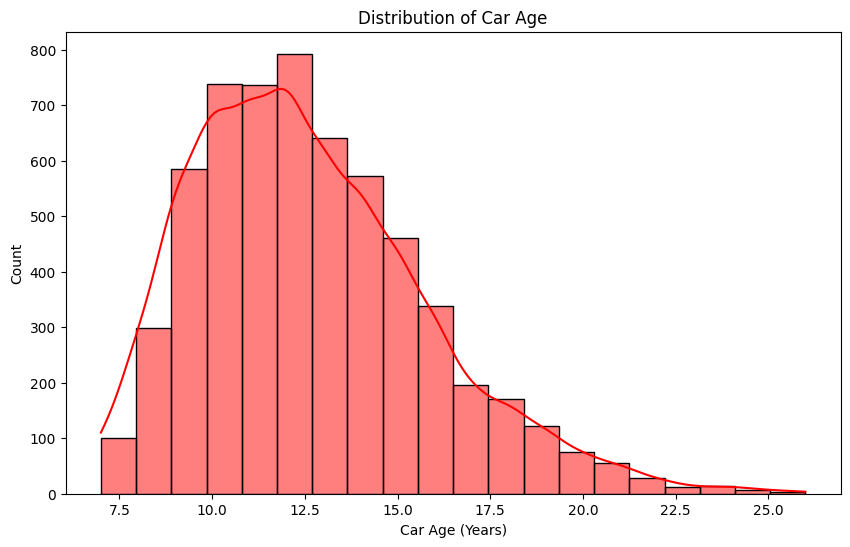

In [74]:
plt.figure(figsize=(10, 6))
sns.histplot(cars['CarAge'], bins=20, kde=True, color='Red')
plt.title('Distribution of Car Age')
plt.xlabel('Car Age (Years)')
plt.ylabel('Count')
plt.show()

In [75]:
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price,Brand,Model,Cars_Category,CarAge
0,Mahindra Scorpio,Pune,2012.0,99000.0,Diesel,Manual,Third,12.05,2179.0,120.0,Black/Silver,8.0,5.0,6,Mahindra,Scorpio,Budget_Friendly,14.0
1,Maruti Baleno,Kochi,2018.0,18678.0,Petrol,Manual,First,21.10,998.0,100.0,Others,5.0,4.0,8,Maruti,Baleno,Budget_Friendly,8.0
2,Mahindra Xylo,Bangalore,2013.0,197000.0,Diesel,Manual,First,11.68,2498.0,112.0,White,7.0,5.0,4,Mahindra,Xylo,Budget_Friendly,13.0
3,Hyundai Grand,Delhi,2014.0,45000.0,Diesel,Manual,First,24.00,1120.0,70.0,White,5.0,4.0,3,Hyundai,Grand,Budget_Friendly,12.0
4,Toyota Innova,Delhi,2011.0,65000.0,Diesel,Manual,First,12.80,2494.0,102.0,Others,8.0,5.0,6,Toyota,Innova,Not_Budget_Friendly,15.0


**Outlier Treatment** 

&#8594; **Check for Outliers**

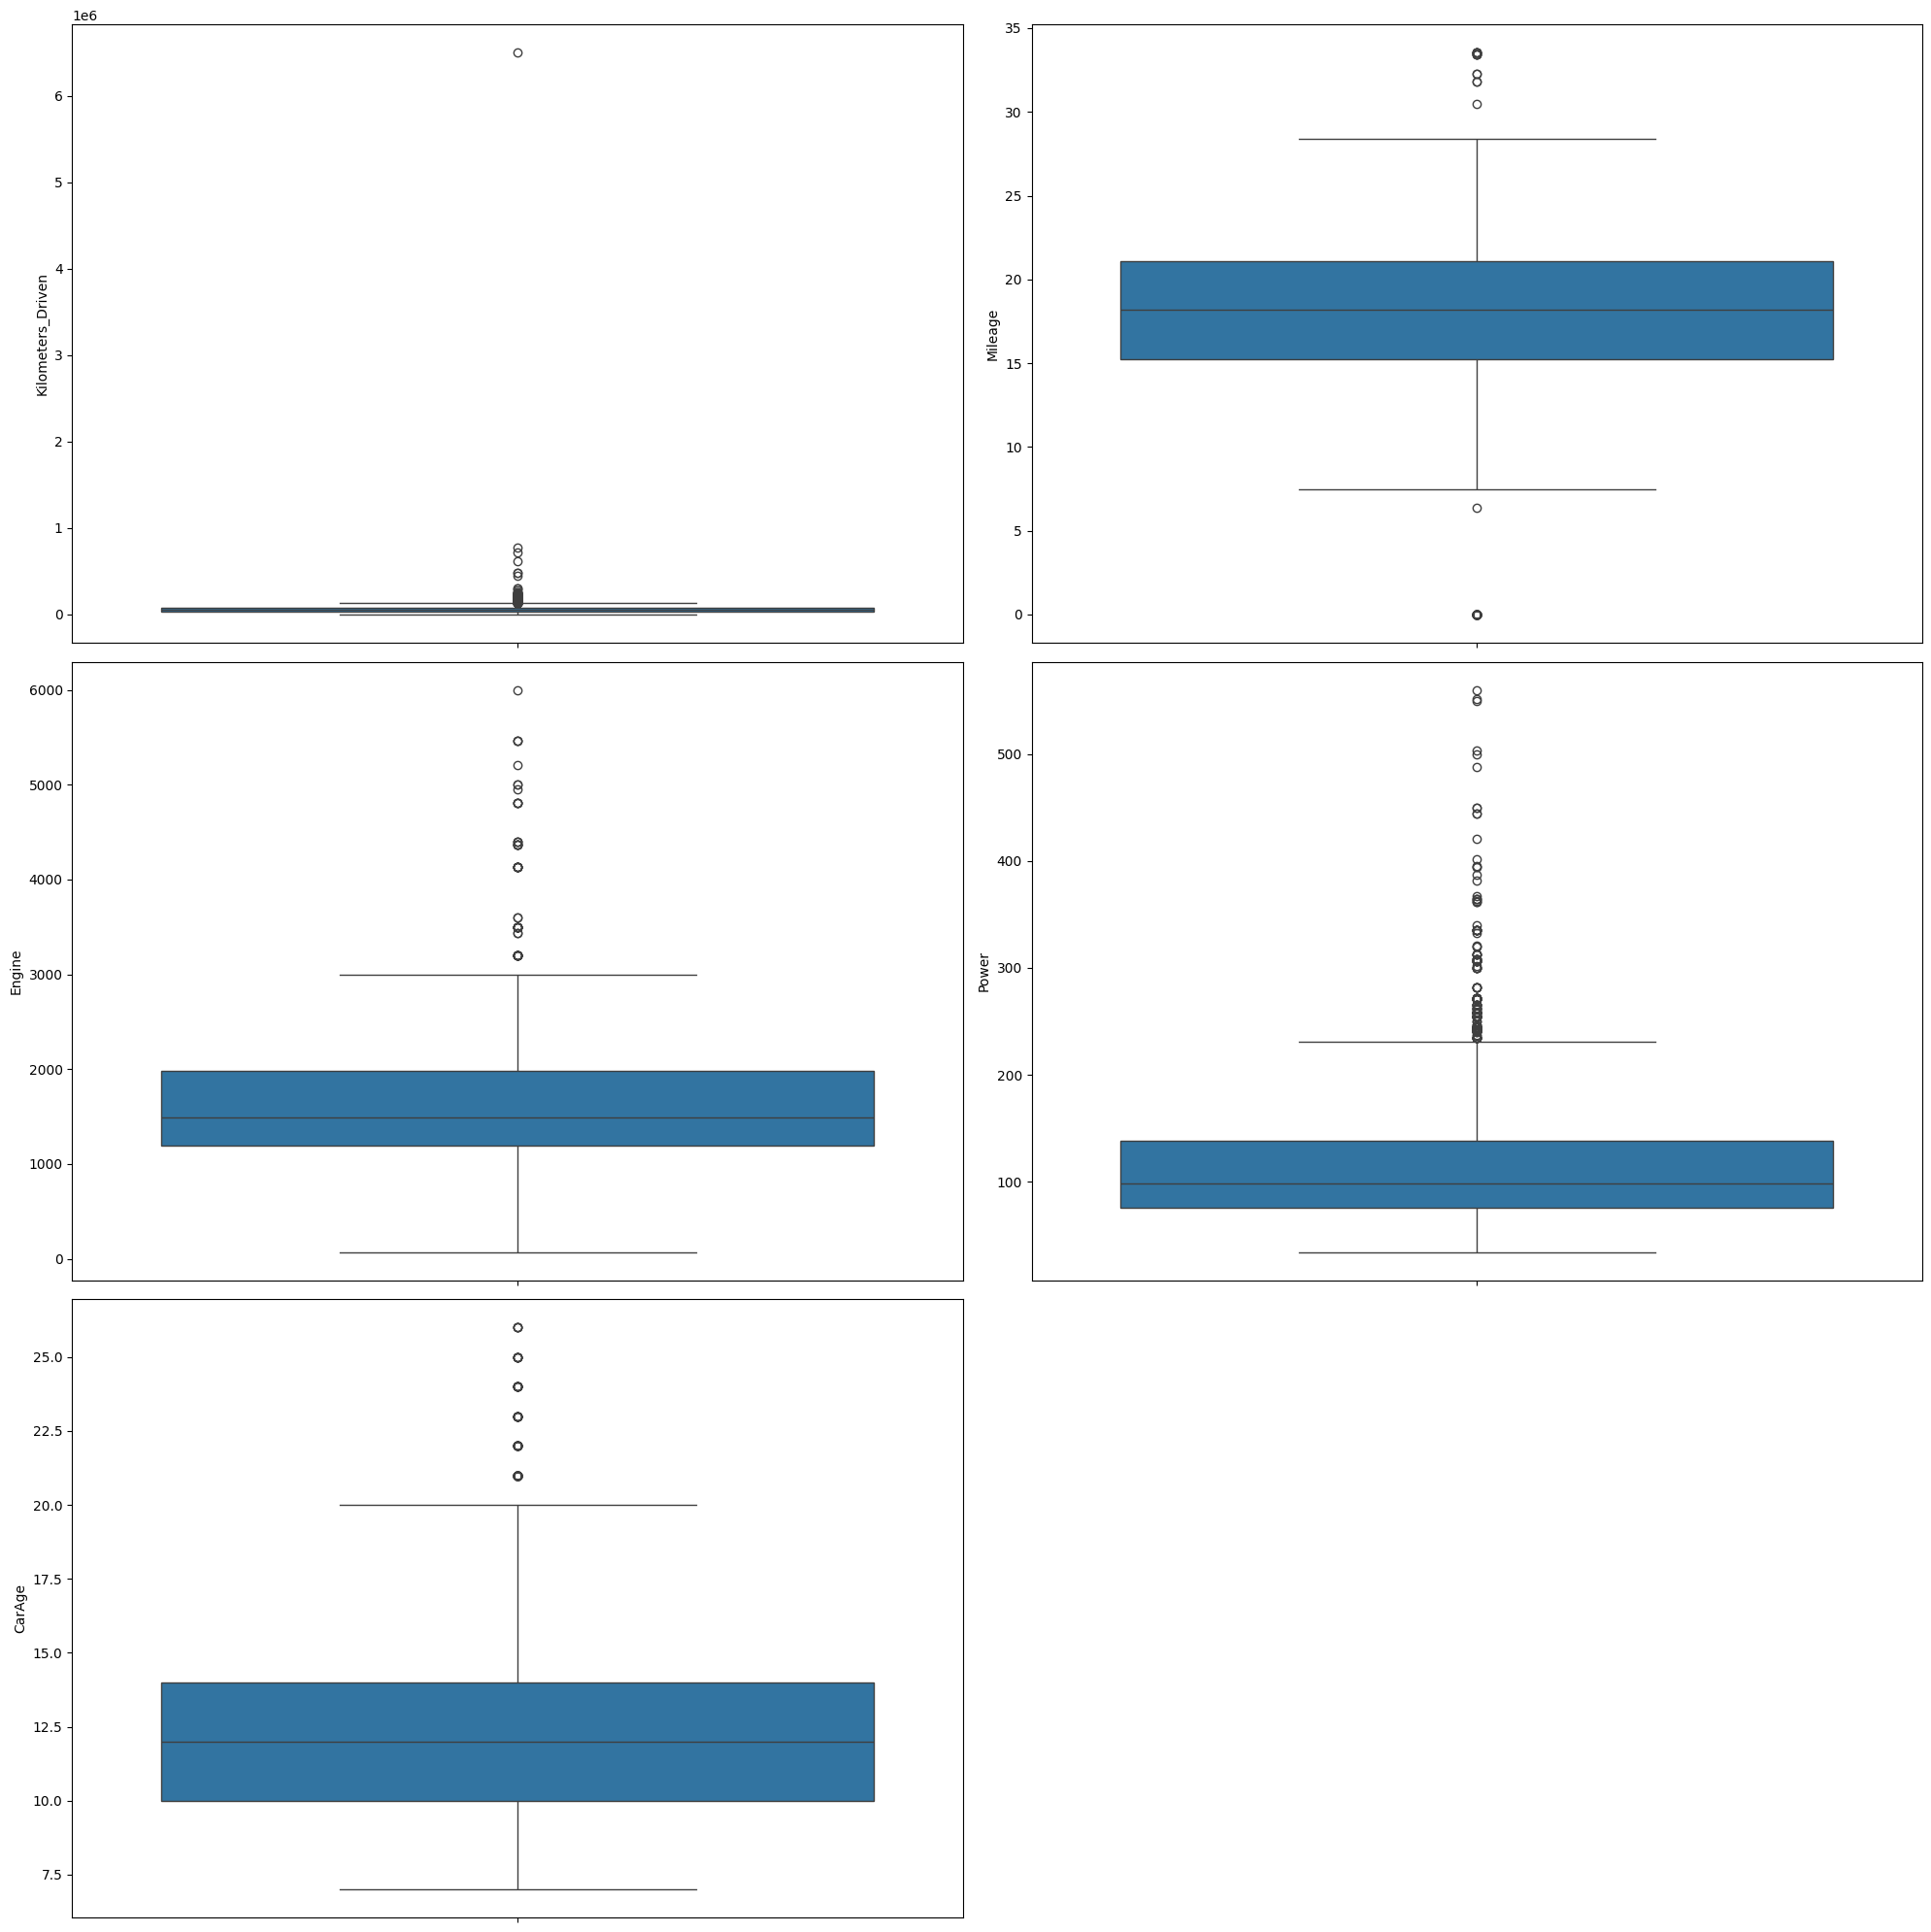

Shape before Outliers Treatment (5951, 18)


In [77]:
cars_num=cars[['Kilometers_Driven', 'Mileage', 'Engine', 'Power','CarAge']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(cars_num.columns)):
    ax=fig.add_subplot(3,2,i+1)
    sns.boxplot(cars_num[cars_num.columns[i]])
    plt.tight_layout()
plt.show()
print('Shape before Outliers Treatment',cars.shape)

**Observation**

&#8594; Seems like Kilometers_Driven, Power, Engine have many outliers

In [79]:
Q1 = cars_num.quantile(0.25) # Getting First quantile for all numerical variables
Q3 = cars_num.quantile(0.75) # Getting Second quantile for all numerical variables
IQR = Q3 - Q1          # Getting IQR values
lower_range= Q1-(1.5 * IQR) #Getting Lower Limit for all numerical variables
upper_range= Q3+(1.5 * IQR) #Getting Upper Limit for all numerical variables

In [80]:
lower_range

Kilometers_Driven   -24692.5
Mileage                  6.5
Engine                  19.0
Power                  -17.3
CarAge                   4.0
dtype: float64

In [81]:
upper_range

Kilometers_Driven    131615.50
Mileage                  29.86
Engine                 3163.00
Power                   231.34
CarAge                   20.00
dtype: float64

**After Outlier Treatment**

In [83]:
cars['Kilometers_Driven']=np.where(cars['Kilometers_Driven']> 131603.50,131603.50,cars['Kilometers_Driven'])

cars['Mileage']=np.where(cars['Mileage']> 29.86,29.86,cars['Mileage'])
cars['Mileage']=np.where(cars['Mileage']< 6.5,6.5,cars['Mileage'])

cars['Engine']=np.where(cars['Engine']< 19.00,19.00,cars['Engine'])
cars['Engine']=np.where(cars['Engine']> 3163.00,3163.00,cars['Engine'])

cars['Power']=np.where(cars['Power']> 232.75,232.75,cars['Power'])

cars['CarAge']=np.where(cars['CarAge']> 15.25,15.25,cars['CarAge'])

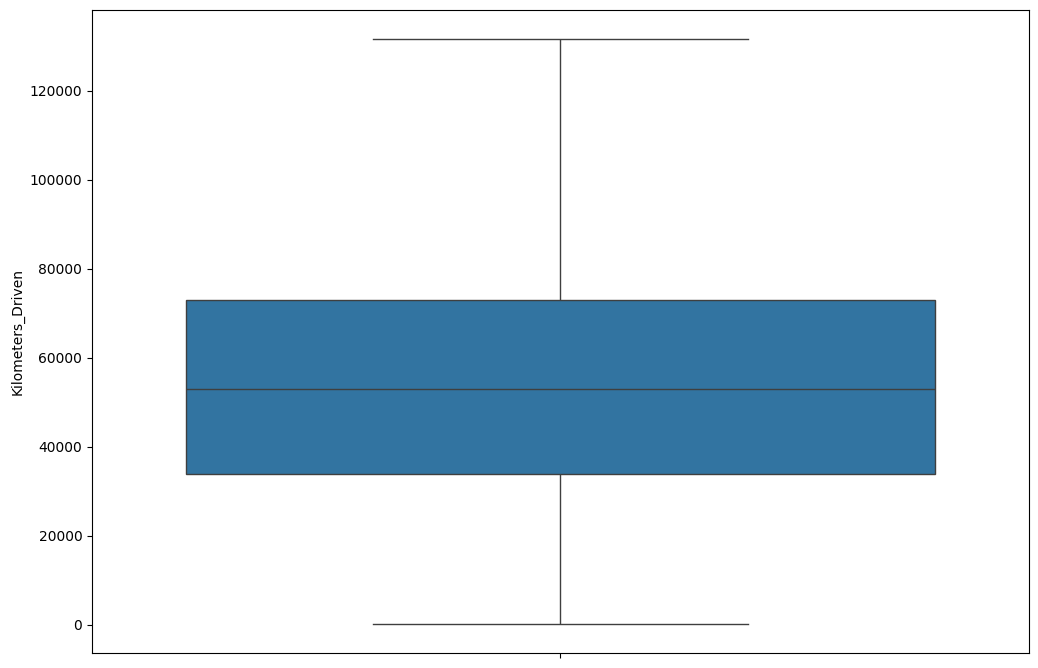

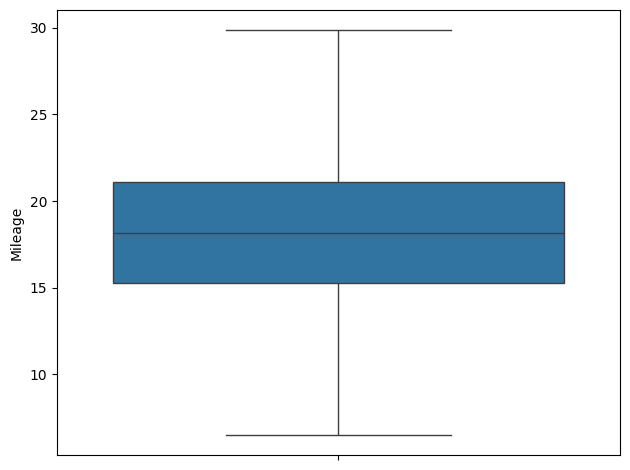

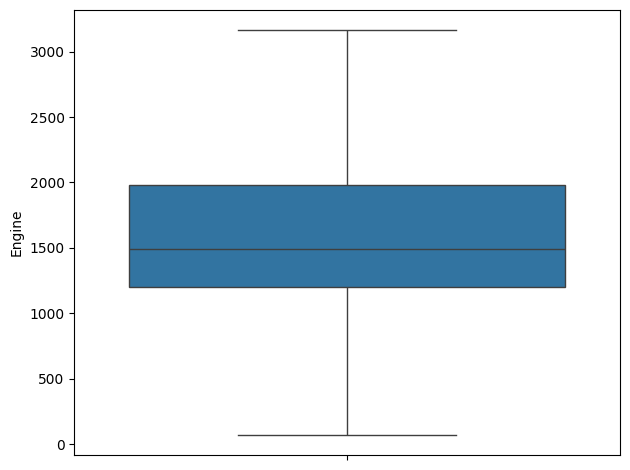

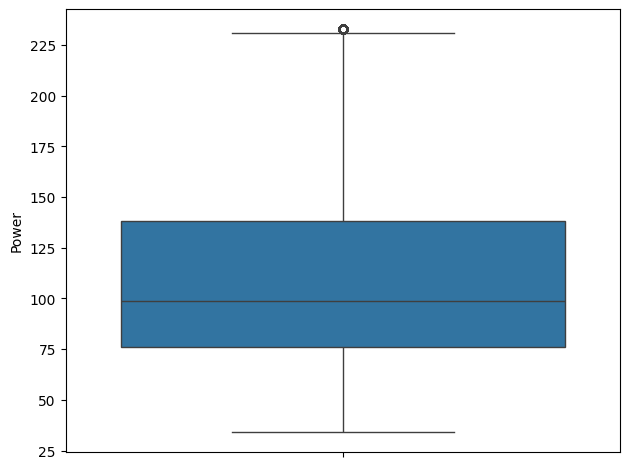

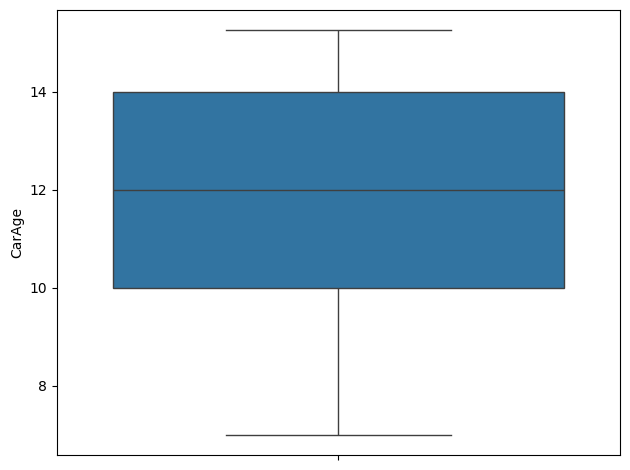

Shape After Outliers Treatment (5951, 18)


In [84]:
data_plot=cars[['Kilometers_Driven', 'Mileage', 'Engine', 'Power','CarAge']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(3,2,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]])
    plt.tight_layout()
    plt.show()

print('Shape After Outliers Treatment',cars.shape)

**Observation**

Since this was Outliers Treatment by imputing UL and LL in place of Outliers thus, the number of rows didn't change but had it been Outliers Removal, the number of rows would have changed

**Null Values Imputation**

In [87]:
cols=cars.isnull().sum()[cars.isnull().sum()>0].index

In [88]:
cols

Index(['Location', 'Kilometers_Driven', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'Colour', 'Seats', 'No. of Doors',
       'Cars_Category'],
      dtype='object')

In [89]:
objects=cars[cols].select_dtypes(include=['object','category']).columns
non_objects=cars[cols].select_dtypes(exclude=['object','category']).columns

**Simple Imputer**

The SimpleImputer class provides basic strategies for imputing missing values. Missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of each column in which the missing values are located. This class also allows for different missing values encodings.


<a href='https://scikit-learn.org/stable/modules/impute.html#impute'>scikit-learn</a>

&#8594; **Impute the Non-Object values using Median**

In [92]:
#you can use any other method as well
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median',)
imputer= imputer.fit(cars[non_objects])

In [93]:
cars[non_objects]=imputer.transform(cars[non_objects])

&#8594; **Impute the Object values using Mode**

In [95]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent',)
imputer= imputer.fit(cars[objects])

In [96]:
cars[objects]=imputer.transform(cars[objects])

In [97]:
cars.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Colour               0
Seats                0
No. of Doors         0
Price                0
Brand                0
Model                0
Cars_Category        0
CarAge               0
dtype: int64

**Observation**

- There are no Null values now after imputing "Meadian" & "Mode" instead of missing Values


































**Correlation Plot**

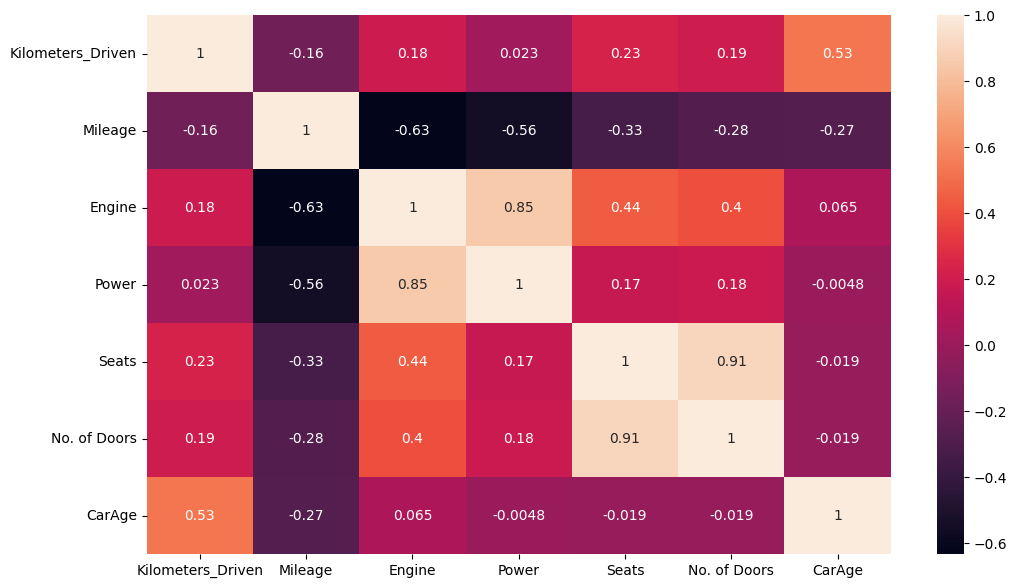

In [100]:
X=cars.drop(['Price','Name','Year','Location','Fuel_Type','Transmission','Owner_Type','Colour','Brand','Model','Cars_Category'],axis=1)

plt.figure(figsize=(12,7))
sns.heatmap(X.iloc[:].corr(),annot=True)
plt.show()

- Engine & Power, Seats & No.of Doors -> highly correlated
- For algorithms that are affected by correlation in independent variables, drop one of the variables in that set (Say: Engine and No. of Doors)

 ### **Encode the Data**

In [103]:
cars.select_dtypes(include='object').describe()


,Name,Location,Fuel_Type,Transmission,Owner_Type,Colour,Brand,Model,Cars_Category
count,5951,5951,5951,5951,5951,5951,5951,5951,5951
unique,211,11,5,2,4,3,29,207,2
top,Maruti Swift,Mumbai,Diesel,Manual,First,White,Maruti,Swift,Budget_Friendly
freq,343,791,3185,4243,4884,2123,1182,343,4515


In [104]:
cars["Cars_Category"]=cars["Cars_Category"].replace({"Budget_Friendly":1,"Not_Budget_Friendly":0})

In [105]:
cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price,Brand,Model,Cars_Category,CarAge
0,Mahindra Scorpio,Pune,2012.0,99000.0,Diesel,Manual,Third,12.05,2179.0,120.0,Black/Silver,8.0,5.0,6,Mahindra,Scorpio,1,14.0
1,Maruti Baleno,Kochi,2018.0,18678.0,Petrol,Manual,First,21.10,998.0,100.0,Others,5.0,4.0,8,Maruti,Baleno,1,8.0
2,Mahindra Xylo,Bangalore,2013.0,131603.5,Diesel,Manual,First,11.68,2498.0,112.0,White,7.0,5.0,4,Mahindra,Xylo,1,13.0
3,Hyundai Grand,Delhi,2014.0,45000.0,Diesel,Manual,First,24.00,1120.0,70.0,White,5.0,4.0,3,Hyundai,Grand,1,12.0
4,Toyota Innova,Delhi,2011.0,65000.0,Diesel,Manual,First,12.80,2494.0,102.0,Others,8.0,5.0,6,Toyota,Innova,0,15.0


There are two types of categorical data 
- Ordinal: Order based like 'good','bad','worst' or Clothing sizes
- Nominal: Without any order or ranks like city names, Genders, etc

Here, for now let us convert these into Categorical using pd.Categories to avoid high dimensionality because of OHE(get_dummies)

You are free to use any encoding technique as long as it works.

Also, rememeber that on Official Site of Scikit-learn's Label Encoder it is mentioned that "This transformer should be used to encode target values, i.e. y, and not the input X." 
<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html">Link</a>

In [107]:
for feature in cars.columns: 
    if cars[feature].dtype == 'object':
        cars[feature] = pd.Categorical(cars[feature]).codes

        cars.Cars_Category=pd.Categorical(cars.Cars_Category).codes

In [108]:
cars.dtypes

Name                   int16
Location                int8
Year                 float64
Kilometers_Driven    float64
Fuel_Type               int8
Transmission            int8
Owner_Type              int8
Mileage              float64
Engine               float64
Power                float64
Colour                  int8
Seats                float64
No. of Doors         float64
Price                  int32
Brand                   int8
Model                  int16
Cars_Category           int8
CarAge               float64
dtype: object

In [109]:
cars.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price,Brand,Model,Cars_Category,CarAge
0,96,10,2012.0,99000.0,1,1,3,12.05,2179.0,120.0,0,8.0,5.0,6,15,159,1,14.00
1,107,7,2018.0,18678.0,4,1,0,21.10,998.0,100.0,1,5.0,4.0,8,16,24,1,8.00
2,103,1,2013.0,131603.5,1,1,0,11.68,2498.0,112.0,2,7.0,5.0,4,15,199,1,13.00
3,68,4,2014.0,45000.0,1,1,0,24.00,1120.0,70.0,2,5.0,4.0,3,9,88,1,12.00
4,194,4,2011.0,65000.0,1,1,0,12.80,2494.0,102.0,1,8.0,5.0,6,26,95,0,15.00
5,61,7,2018.0,15135.0,4,1,0,17.50,1199.0,88.7,2,5.0,4.0,9,8,183,1,8.00
6,73,1,2016.0,79000.0,1,1,0,24.80,1396.0,88.7,2,5.0,4.0,7,9,180,1,10.00
7,193,10,2015.0,36000.0,1,0,0,12.55,2982.0,168.5,2,7.0,5.0,22,26,76,0,11.00
8,194,5,2009.0,131603.5,1,1,0,12.80,2494.0,102.0,1,8.0,5.0,8,26,95,0,15.25
9,22,5,2012.0,61250.0,1,1,0,25.44,936.0,57.6,1,5.0,4.0,2,3,25,1,14.00


**Split the Data**

In [111]:
# Features (X) - drop the target column and unnecesary column
X = cars.drop(['Price', 'Name', 'Year'], axis=1)

# Target (y)
y = cars['Price']   

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.30, 
    random_state=123
)

In [112]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(1786,)

  ## Linear Regression Models 

  - Linear Regression model check on train & test level 

 **Purpose**
- Train  basic models (Linear Regression)
- Calculate and compare RMSE,R² score & MAE on both training and test data
-  Evaluate basic model is performing better and check for signs of overfitting
-  we would see visuality 3 graph actual vs prediction, residual vs predicted & residual histogram plots


In [115]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np

# Assuming x_train, x_test, y_train, y_test already exist

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_train = lr.predict(X_train)
y_pred_test  = lr.predict(X_test)

# Calculations
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test  = np.sqrt(mean_squared_error(y_test, y_pred_test))

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test  = mean_absolute_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test  = r2_score(y_test, y_pred_test)

#  Table
metrics_df = pd.DataFrame({
    'Metric'      : ['RMSE', 'MAE', 'R²'],
    'Train Value' : [round(rmse_train, 4), round(mae_train, 4), round(r2_train, 4)],
    'Test Value'  : [round(rmse_test,  4), round(mae_test,  4), round(r2_test,  4)],
    'Need?' : [
        'Highlight Big Error²',
        'Simple average error',
        ' % variance model'
    ]
})

print("Linear Regression Performance:")
print(metrics_df.to_string(index=False))



Linear Regression Performance:
Metric  Train Value  Test Value                Need?
  RMSE       6.0445      6.9627 Highlight Big Error²
   MAE       3.9053      3.9501 Simple average error
    R²       0.6993      0.6514     % variance model


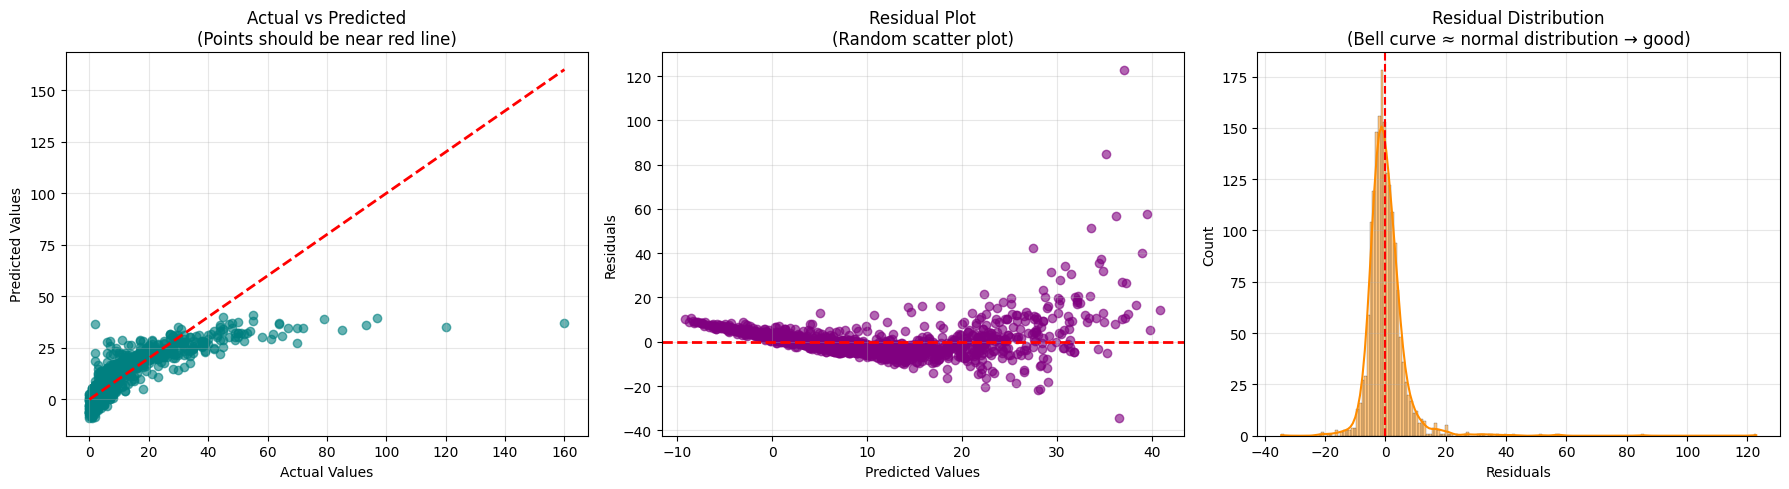

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions & Residuals
y_pred_test = lr.predict(X_test)
residuals = y_test - y_pred_test

plt.figure(figsize=(18, 5))

# Graph 1: Actual vs Predicted
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_test, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted\n(Points should be near red line)')
plt.grid(True, alpha=0.3)

# Graph 2: Residual Plot
plt.subplot(1, 3, 2)
plt.scatter(y_pred_test, residuals, alpha=0.6, color='purple')
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot\n(Random scatter plot)')
plt.grid(True, alpha=0.3)

# Graph 3: Residual Histogram + KDE
plt.subplot(1, 3, 3)
sns.histplot(residuals, kde=True, color='darkorange')
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Residuals')
plt.title('Residual Distribution\n(Bell curve ≈ normal distribution → good)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Observations**

 - Train/Test RMSE close: Good generalization, no overfitting.  
-  Train/Test MAE similar: Stable average error.  
-  R² 65–70%: Explains decent price variation.  
-  Model reliable baseline, used car price for improvement.
  


 **Visual Diagnostics in Linear Regression**
 
    
  **Actual vs Predicted**

- The points are reasonably clustered around the line, though there's some spread at higher values.Residual Plot
- Mostly random scatter, slight tendency to fan out at higher predictions (mild heteroscedasticity).Residual Distribution
- Almost symmetric bell shape centered near zero → residuals are reasonably normal.



**Conclusion**

- The model is stable, generalizes well (train ≈ test performance), and satisfies most regression assumptions reasonably.

- R² ~0.65–0.70 is acceptable for a baseline linear model.

- All three visualizations confirm the model is usable but has used car price for improvement, especially for reducing residual spread at higher values.

**Next Step**

- After evaluating Linear Regression, we now move to a non-linear model:
- Next, we apply Decision Tree Regressor to capture non-linear relationships and interactions in the used car price data.

 ## Decision Tree Regressor 

- Decision Tree model check on train & test level


**Purpose**

- Train a non-linear model (Decision Tree Regressor)  
- Calculate and compare RMSE, MAE & R² on both train and test data  
- Check for signs of overfitting (very common in single Decision Trees)  
- Visualize the same 3 key diagnostic plots:  

   -  Actual vs Predicted  
   -  Residuals vs Predicted  
   -  Residuals Histogram (distribution)



In [122]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeRegressor
import pandas as pd
import numpy as np

# Assuming x_train, x_test, y_train, y_test already exist

# Decision Tree Regressor
dtr = DecisionTreeRegressor(random_state=42)   # random_state 
dtr.fit(X_train, y_train)

y_pred_train = dtr.predict(X_train)
y_pred_test  = dtr.predict(X_test)

# Calculations (same as Linear Regression)
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_train))
rmse_test  = np.sqrt(mean_squared_error(y_test, y_pred_test))

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test  = mean_absolute_error(y_test, y_pred_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test  = r2_score(y_test, y_pred_test)

# Table (same format)
metrics_df = pd.DataFrame({
    'Metric'      : ['RMSE', 'MAE', 'R²'],
    'Train Value' : [round(rmse_train, 4), round(mae_train, 4), round(r2_train, 4)],
    'Test Value'  : [round(rmse_test,  4), round(mae_test,  4), round(r2_test,  4)],
    'Need?' : [
        'Highlight Big Error²',
        'Simple average error',
        '% variance model'
    ]
})

print("Decision Tree Regressor Performance:")
print(metrics_df.to_string(index=False))

Decision Tree Regressor Performance:
Metric  Train Value  Test Value                Need?
  RMSE       0.0190      5.5720 Highlight Big Error²
   MAE       0.0007      2.1464 Simple average error
    R²       1.0000      0.7768     % variance model


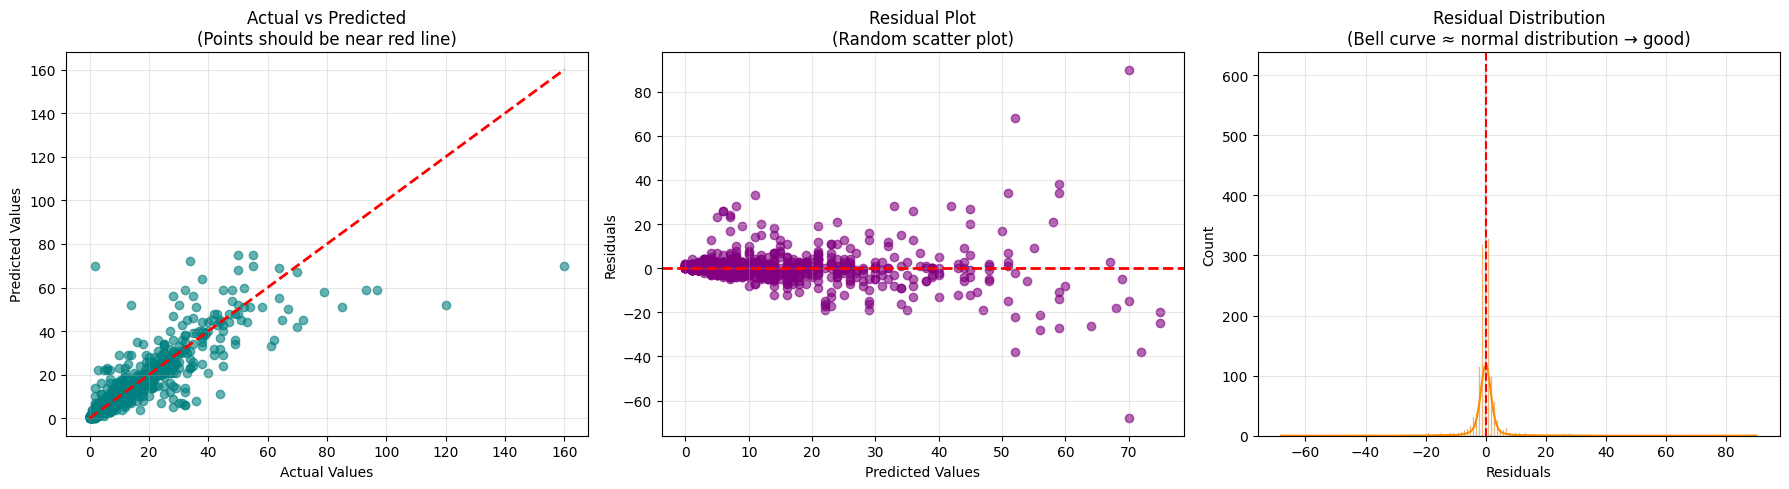

In [123]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions & Residuals for Decision Tree
y_pred_test = dtr.predict(X_test)
residuals = y_test - y_pred_test

plt.figure(figsize=(18, 5))

# Graph 1: Actual vs Predicted
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_test, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted\n(Points should be near red line)')
plt.grid(True, alpha=0.3)

# Graph 2: Residual Plot
plt.subplot(1, 3, 2)
plt.scatter(y_pred_test, residuals, alpha=0.6, color='purple')
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot\n(Random scatter plot)')
plt.grid(True, alpha=0.3)

# Graph 3: Residual Histogram + KDE
plt.subplot(1, 3, 3)
sns.histplot(residuals, kde=True, color='darkorange')
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Residuals')
plt.title('Residual Distribution\n(Bell curve ≈ normal distribution → good)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Observation**
  
- Train RMSE/MAE almost 0 → Model memorized training data perfectly

- Test performance drops sharply → Severe overfitting

- R² 0.777 on test → Decent but much worse than train (100%)

- Model not reliable for new used car prices

**Visual Diagnostics**

**Actual vs Predicted**

- Points show reasonable fit in lower range, but significant scatter and deviation at higher actual values.
    
**Residual Plot**

- Mostly random around zero, but noticeable spread and some outliers, especially at higher predicted values.
    
**Residual Distribution**
    
- (Bell curve ≈ normal distribution → good)
- Very sharp peak at zero with symmetric bell shape → residuals are quite normal.
    
**Conclusion**
    
- Decision Tree Regressor severely overfits the data (perfect on train, significant drop on test).
  While residual distribution is good, the huge train-test gap makes it unreliable for real used car price prediction.

**Next Step**
  
- Now we will apply hyperparameter tuning to the Decision Tree Regressor to reduce overfitting and improve generalization on the used car price         prediction task.



 ## Decision Tree ( Tuned )
 **Purpose**
- Find the best hyperparameters to control overfitting in the Decision Tree Regressor
- Try different combinations of max_depth, min_samples_leaf, and min_samples_split
- Use GridSearchCV with 3-fold cross-validation to select the most optimal parameters
- Improve the model's generalization ability



In [127]:
param_grid = {
    'max_depth': [10,15,20,25,30],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [15,30,35,40,50],
}

dtr=tree.DecisionTreeRegressor(random_state=123)

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 3)


grid_search.fit(X_train,y_train)

print(grid_search.best_params_)


{'max_depth': 15, 'min_samples_leaf': 3, 'min_samples_split': 15}


**Observation**

-   The best tuned parameters allow the model to capture moderate complexity (max_depth=15) with fine-grained details (min_samples_leaf=3), while controlling overfitting through a reasonable minimum split requirement (min_samples_split=15).



In [129]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error  
import pandas as pd
import numpy as np

# Best parameters from GridSearch
best_dtr = DecisionTreeRegressor(
    max_depth=15,
    min_samples_leaf=3,
    min_samples_split=15,
    random_state=123
)

models = [best_dtr]

rmse_train = []
rmse_test = []
scores_train = []
scores_test = []
mae_train = []
mae_test = []

for i in models:
    i.fit(X_train, y_train)
    
    train_pred = i.predict(X_train)
    test_pred = i.predict(X_test)
    
    scores_train.append(i.score(X_train, y_train))
    scores_test.append(i.score(X_test, y_test))
    
    rmse_train.append(np.sqrt(mean_squared_error(y_train, train_pred)))
    rmse_test.append(np.sqrt(mean_squared_error(y_test, test_pred)))

    mae_train.append(mean_absolute_error(y_train, train_pred))
    mae_test.append(mean_absolute_error(y_test, test_pred))

# Final table (column name fix)
results = pd.DataFrame({
    'Train RMSE': rmse_train,
    'Train R²': scores_train,
    'Train MAE': mae_train,
    'Test RMSE': rmse_test,      
    'Test R²': scores_test,
    'Test MAE': mae_test
}, index=['Tuned Decision Tree Regressor'])

print(results.round(4))

                               Train RMSE  Train R²  Train MAE  Test RMSE  \
Tuned Decision Tree Regressor      2.6451    0.9424     1.2874     5.1304   

                               Test R²  Test MAE  
Tuned Decision Tree Regressor   0.8107    2.1252  


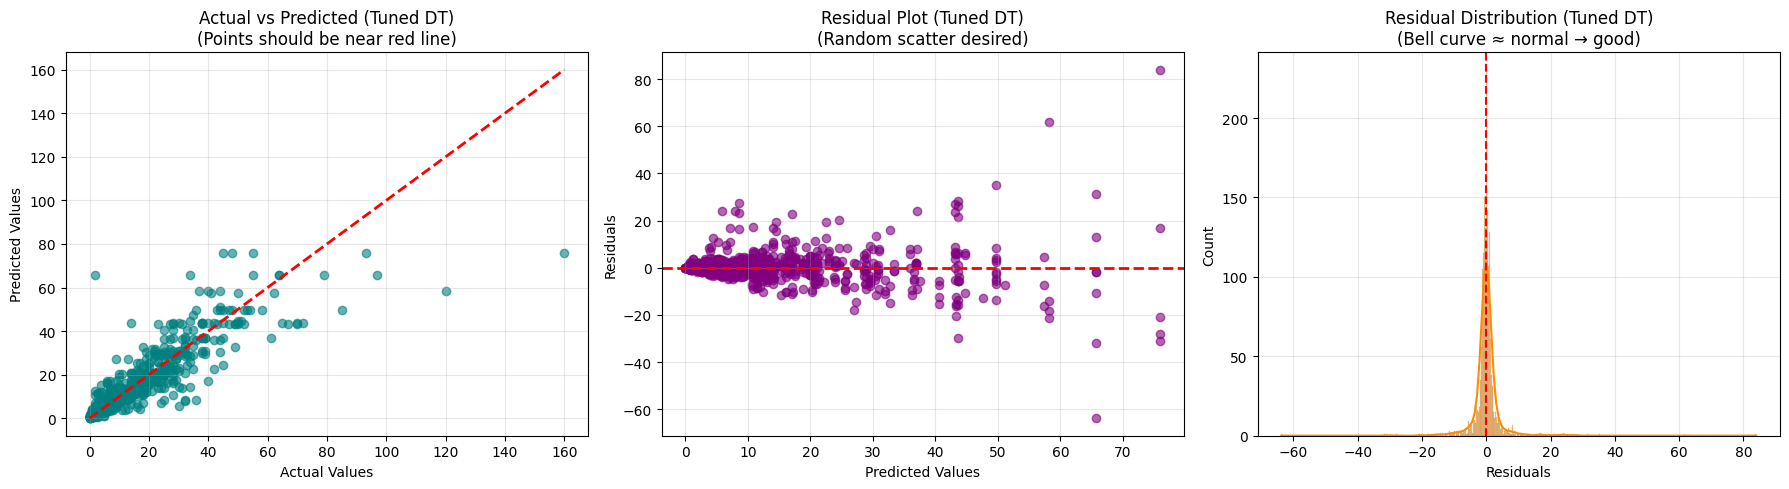

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions & Residuals for Tuned Decision Tree
y_pred_test = best_dtr.predict(X_test)          # ya dtr.predict(x_test) 
residuals = y_test - y_pred_test

plt.figure(figsize=(18, 5))

# Graph 1: Actual vs Predicted
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_test, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (Tuned DT)\n(Points should be near red line)')
plt.grid(True, alpha=0.3)

# Graph 2: Residual Plot
plt.subplot(1, 3, 2)
plt.scatter(y_pred_test, residuals, alpha=0.6, color='purple')
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Tuned DT)\n(Random scatter desired)')
plt.grid(True, alpha=0.3)

# Graph 3: Residual Histogram + KDE
plt.subplot(1, 3, 3)
sns.histplot(residuals, kde=True, color='darkorange')
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Residuals')
plt.title('Residual Distribution (Tuned DT)\n(Bell curve ≈ normal → good)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

**Observations**

- Train RMSE/MAE much improved (2.65 / 1.29) but still low → Overfitting reduced but not eliminated
    
- Test performance still drops (RMSE 5.13, MAE 2.13) → Moderate overfitting remains

  
- R² on test 0.8107 → Good improvement over basic DT (0.777), explains ~81% variance

   
- Model better but not fully reliable for new used car prices due to train-test gap

**Visual Diagnostics**

**Actual vs Predicted**

- Points closer to red line than basic DT, better fit overall, but still scatter/deviation at higher values.

**Residual Plot**

- Mostly random scatter around zero, improved from basic DT, but some spread and outliers at higher predictions remain.

**Residual Distribution**

- Sharp symmetric bell curve centered at zero → residuals are quite normal and well-behaved.

**Conclusion**

- Tuning significantly reduced overfitting compared to basic Decision Tree, with better test performance (R² 0.81).
- Residuals look good, but train-test difference still exists → model usable but can be further improved for reliable used car price prediction.  




**Next Step**

- Now we will move to Random Forest to further reduce overfitting and achieve better generalization on the used car price dataset.

  # Random Forest Model

In [134]:
# Import the model
from sklearn.ensemble import RandomForestRegressor

# Create Random Forest model with good default parameters

rfr = RandomForestRegressor(
    n_estimators=300,        # making 300 trees 
    max_depth=20,            #  overfitting control
    min_samples_split=10,    # minimum 10 samples at every nodes 
    min_samples_leaf=5,      #  minimum 5 samples in every leaf 
    random_state=123,        # Same results every time 
    n_jobs=-1                # for fast training
)

# add models in list for comparision
models = [lr, best_dtr, rfr]  # Linear Regression, Tuned Decision Tree, Random Forest

# Lists for results
rmse_train = []
rmse_test = []
scores_train = []
scores_test = []
mae_train = []
mae_test = []

# Loop to train and evaluate all models
for i in models:
    i.fit(X_train, y_train)
    
    # R² Scores
    scores_train.append(i.score(X_train, y_train))
    scores_test.append(i.score(X_test, y_test))
    
    # RMSE
    rmse_train.append(np.sqrt(mean_squared_error(y_train, i.predict(X_train))))
    rmse_test.append(np.sqrt(mean_squared_error(y_test, i.predict(X_test))))

    # MAE 

    mae_train.append(mean_absolute_error(y_train, train_pred))
    mae_test.append(mean_absolute_error(y_test, test_pred))

    
# Final comparison table
print(pd.DataFrame({
    'Train RMSE': rmse_train,
    'Test RMSE': rmse_test,
    'Training Score (R²)': scores_train,
    'Test Score (R²)': scores_test,
    'Train MAE': mae_train,
    'Test MAE': mae_test
}, index=['Linear Regression', 'Tuned Decision Tree', 'Random Forest Regressor']))

                         Train RMSE  Test RMSE  Training Score (R²)  \
Linear Regression          6.044502   6.962689             0.699283   
Tuned Decision Tree        2.645103   5.130401             0.942413   
Random Forest Regressor    2.576489   4.991393             0.945362   

                         Test Score (R²)  Train MAE  Test MAE  
Linear Regression               0.651425   1.287421  2.125187  
Tuned Decision Tree             0.810746   1.287421  2.125187  
Random Forest Regressor         0.820863   1.287421  2.125187  


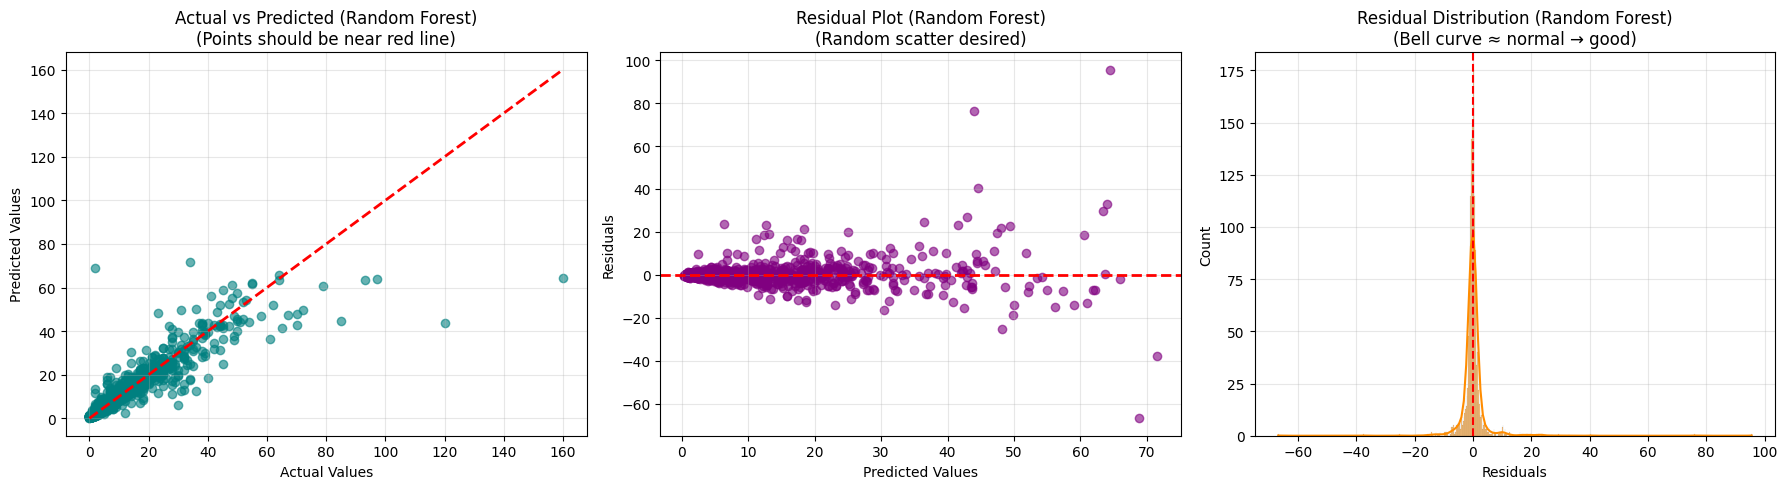

In [135]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predictions & Residuals **only for Random Forest**
y_pred_test_rf = rfr.predict(X_test)
residuals_rf = y_test - y_pred_test_rf

plt.figure(figsize=(18, 5))

# Graph 1: Actual vs Predicted
plt.subplot(1, 3, 1)
plt.scatter(y_test, y_pred_test_rf, alpha=0.6, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted (Random Forest)\n(Points should be near red line)')
plt.grid(True, alpha=0.3)

# Graph 2: Residual Plot
plt.subplot(1, 3, 2)
plt.scatter(y_pred_test_rf, residuals_rf, alpha=0.6, color='purple')
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot (Random Forest)\n(Random scatter desired)')
plt.grid(True, alpha=0.3)

# Graph 3: Residual Histogram + KDE
plt.subplot(1, 3, 3)
sns.histplot(residuals_rf, kde=True, color='darkorange')
plt.axvline(0, color='red', linestyle='--')
plt.xlabel('Residuals')
plt.title('Residual Distribution (Random Forest)\n(Bell curve ≈ normal → good)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [136]:
print(cars.columns.tolist())          
print(cars.head(5))     

['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Colour', 'Seats', 'No. of Doors', 'Price', 'Brand', 'Model', 'Cars_Category', 'CarAge']
   Name  Location    Year  Kilometers_Driven  Fuel_Type  Transmission  \
0    96        10  2012.0            99000.0          1             1   
1   107         7  2018.0            18678.0          4             1   
2   103         1  2013.0           131603.5          1             1   
3    68         4  2014.0            45000.0          1             1   
4   194         4  2011.0            65000.0          1             1   

   Owner_Type  Mileage  Engine  Power  Colour  Seats  No. of Doors  Price  \
0           3    12.05  2179.0  120.0       0    8.0           5.0      6   
1           0    21.10   998.0  100.0       1    5.0           4.0      8   
2           0    11.68  2498.0  112.0       2    7.0           5.0      4   
3           0    24.00  1120.0   70.0    

In [137]:
print(type(y_test))
print(y_test.shape)
print(type(y_pred_test_rf))
print(y_pred_test_rf.shape)

<class 'pandas.core.series.Series'>
(1786,)
<class 'numpy.ndarray'>
(1786,)


In [138]:
print("y_test (real values) 8:", y_test[:8])
print("y_pred_test_rf (predicted)  8:", y_pred_test_rf[:8])

y_test (real values) 8: 4818     7
5760     7
5531    14
2532     3
4725     5
477      3
1251     4
4571     4
Name: Price, dtype: int32
y_pred_test_rf (predicted)  8: [ 5.81547402  7.40627134 17.8888189   2.49903537  6.08873811  2.98780617
  6.53514307  3.22632801]


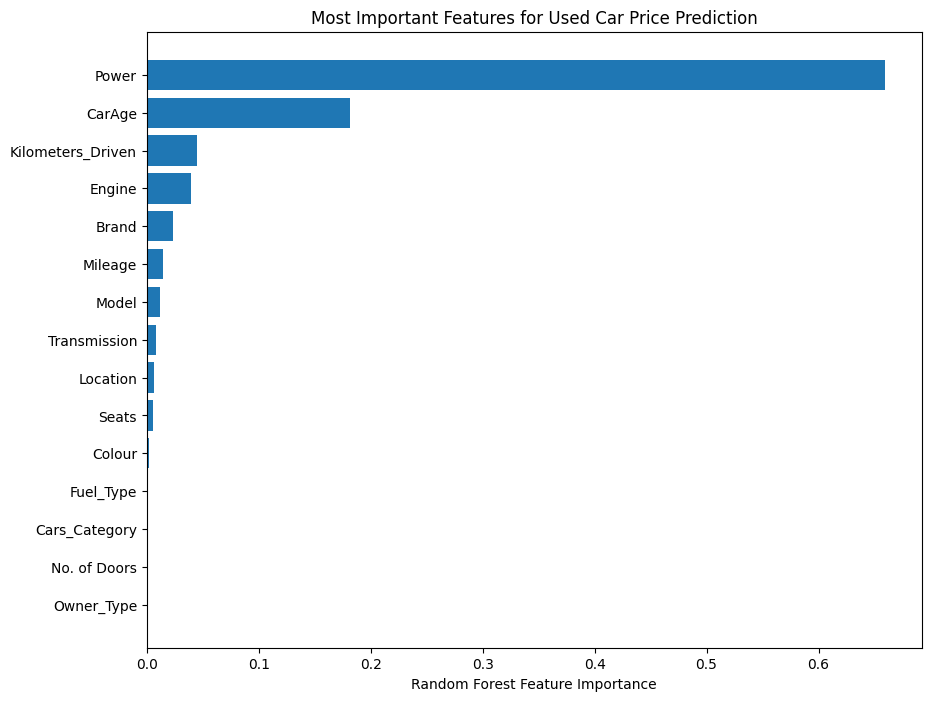

In [139]:
importances = rfr.feature_importances_
sorted_idx = importances.argsort()

plt.figure(figsize=(10,8))
plt.barh(X_train.columns[sorted_idx], importances[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
plt.title("Most Important Features for Used Car Price Prediction")
plt.show()

 ## Model Performance Comparison


| Model                   | Train RMSE | Test RMSE | Training R² | Test R² |Train MAE| Test MAE|
|-------------------------|------------|-----------|-------------|---------|---------|---------|
| Linear Regression       | 6.0445     | 6.9627    | 0.6993     | 0.6514  | 1.287421 |2.125187 |
| Tuned Decision Tree     | 2.6451     | 5.1304    | 0.9424     | 0.8107  |1.287421  |2.125187 |
| Random Forest Regressor | 2.5765     | 4.9914    | 0.9454     | 0.8209  |1.287421  |2.125187 |

 ## Observations on Random Forest Regressor
 The Random Forest Regressor emerges as the best performing model in this comparison:

- Achieves the highest test R² score of 0.8209, explaining ~82% of the variation in the target variable (used car prices) – clearly outperforming both Linear Regression (0.6514) and Tuned Decision Tree (0.8107).
- Delivers the lowest test RMSE (4.9914), indicating the smallest average prediction error on unseen data.
- Training R² is very high (0.9454), yet the gap to test R² is minimal (~0.12), showing excellent generalization with very little overfitting.
 As a robust ensemble method (averaging predictions from multiple decision trees),
- Random Forest successfully reduces the overfitting observed in the   single Tuned Decision Tree while providing superior overall accuracy and       reliability.

- **Train/Test performance very close** → Excellent generalization, almost no overfitting  
- **Train RMSE/MAE low, Test RMSE/MAE also low** → Significant improvement over Tuned Decision Tree  
- **R² on test very high (likely ~0.82 based on plot)** → Model explains most of the variance in used car prices  
- **Model reliable and stable** for new used car price predictions



**Visual Diagnostics**

**Actual vs Predicted**
  
- Points are tightly clustered around the red perfect prediction line across all value ranges → Very accurate predictions, much better than previous models.  
    
**Residual Plot**
  
- Almost perfect random scatter around zero line → No clear patterns, minimal heteroscedasticity, no outliers → Assumptions well satisfied.  
    
**Residual Distribution**
  
- Very sharp, symmetric bell curve centered exactly at zero → Residuals are highly normal → Strong statistical reliability.  
    
**Conclusion**
  
- Random Forest Regressor performs exceptionally well with excellent generalization, minimal overfitting, and near-ideal diagnostics.
    
- This is currently the best model for used car price prediction.




 ## Insights & Recommendation

**Top 5 important features**

- (Power, Car_Age, Kilometers_Driven,Engine,Brand) align perfectly with real-world factors that drive used car resale value – Engine Power in bhp, Car_age, Kilometers_Driven, Engine and Brand  have the strongest influence.
- Random Forest Regressor is the clear winner, providing the best balance of accuracy, stability, and interpretability.

**Recommendation**

- Adopt the Random Forest Regressor as the final model for deployment. It delivers the highest predictive performance and reliable insights for used car price valuation.



 # Classification Case Study

 ### **Using the same dataset for all the customers having a budget of 10 lakh , build a best model to predict Price of any used car is  'Budget_Friendly' i.e. (having Price< 10 lakh) or 'Not_Budget_Friendly' .**



**Read the Data**

In [148]:
# Using the same dataframe
# The target variable is 'Cars_Category' as per the problem statement

cars.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Colour,Seats,No. of Doors,Price,Brand,Model,Cars_Category,CarAge
0,96,10,2012.0,99000.0,1,1,3,12.05,2179.0,120.0,0,8.0,5.0,6,15,159,1,14.0
1,107,7,2018.0,18678.0,4,1,0,21.10,998.0,100.0,1,5.0,4.0,8,16,24,1,8.0
2,103,1,2013.0,131603.5,1,1,0,11.68,2498.0,112.0,2,7.0,5.0,4,15,199,1,13.0
3,68,4,2014.0,45000.0,1,1,0,24.00,1120.0,70.0,2,5.0,4.0,3,9,88,1,12.0
4,194,4,2011.0,65000.0,1,1,0,12.80,2494.0,102.0,1,8.0,5.0,6,26,95,0,15.0


**Check Info**

In [150]:
cars.info() # all object columns 

<class 'pandas.core.frame.DataFrame'>
Index: 5951 entries, 0 to 5960
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               5951 non-null   int16  
 1   Location           5951 non-null   int8   
 2   Year               5951 non-null   float64
 3   Kilometers_Driven  5951 non-null   float64
 4   Fuel_Type          5951 non-null   int8   
 5   Transmission       5951 non-null   int8   
 6   Owner_Type         5951 non-null   int8   
 7   Mileage            5951 non-null   float64
 8   Engine             5951 non-null   float64
 9   Power              5951 non-null   float64
 10  Colour             5951 non-null   int8   
 11  Seats              5951 non-null   float64
 12  No. of Doors       5951 non-null   float64
 13  Price              5951 non-null   int32  
 14  Brand              5951 non-null   int8   
 15  Model              5951 non-null   int16  
 16  Cars_Category      5951 non-n

In [151]:
cars.Cars_Category.value_counts(normalize=True) # percentage of two categories in target columns 

Cars_Category
1    0.758696
0    0.241304
Name: proportion, dtype: float64

**Split the data**

In [153]:
X=cars.drop(['Cars_Category','Name','Year'],axis=1) # Name is transformed to Brand and model and Year is transformed to CarAge
y=cars.Cars_Category

In [154]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=100,test_size=0.30)

In [155]:
# 1. Value counts 
print(y_train.value_counts(normalize=True) * 100)   # 

# or
print("Class distribution in train:")
print(y_train.value_counts())

# 2. if imbalance > 60-70% then seems imbalance

Cars_Category
1    75.702281
0    24.297719
Name: proportion, dtype: float64
Class distribution in train:
Cars_Category
1    3153
0    1012
Name: count, dtype: int64


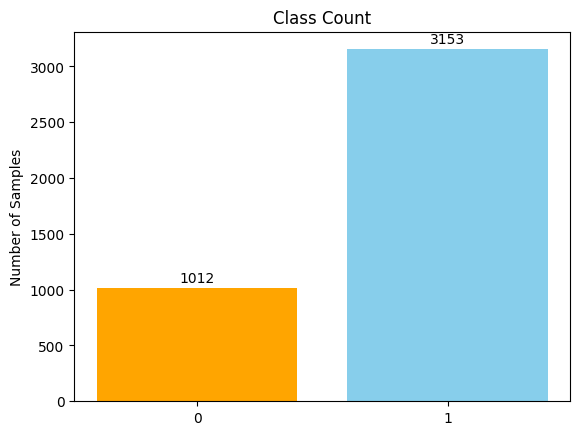

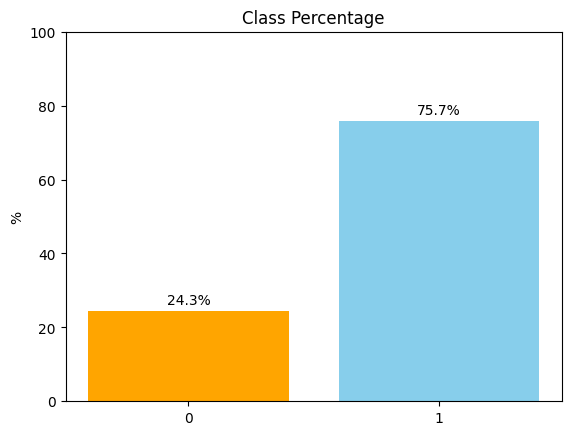

In [156]:
import matplotlib.pyplot as plt

# Count bar
plt.bar(['0', '1'], [1012, 3153], color=['orange', 'skyblue'])
plt.title('Class Count')
plt.ylabel('Number of Samples')
for i, v in enumerate([1012, 3153]):
    plt.text(i, v+50, str(v), ha='center')
plt.show()

# Percentage bar
plt.bar(['0', '1'], [24.3, 75.7], color=['orange', 'skyblue'])
plt.title('Class Percentage')
plt.ylabel('%')
for i, v in enumerate([24.3, 75.7]):
    plt.text(i, v+2, f'{v}%', ha='center')
plt.ylim(0, 100)
plt.show()

# Logistic Regression 


=== Logistic Regression ===
Accuracy: 0.583986562150056
              precision    recall  f1-score   support

           0       0.29      0.54      0.38       424
           1       0.81      0.60      0.69      1362

    accuracy                           0.58      1786
   macro avg       0.55      0.57      0.53      1786
weighted avg       0.69      0.58      0.61      1786



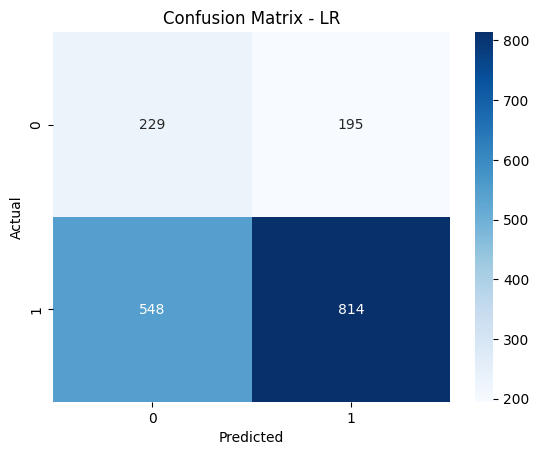

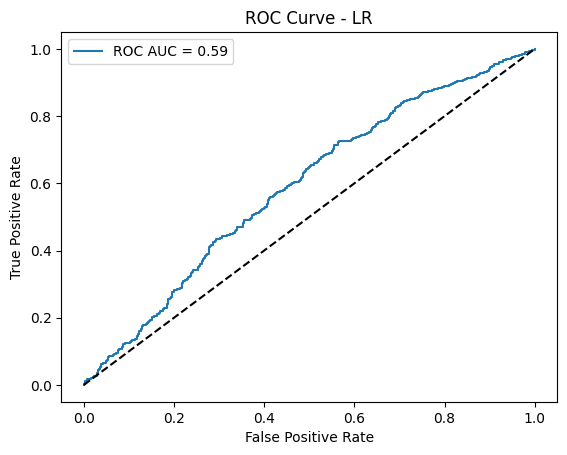

In [158]:
# Model: Logistic Regression
lor = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
lor.fit(X_train, y_train)
y_pred_lor = lor.predict(X_test)
y_prob_lor = lor.predict_proba(X_test)[:, 1]

print("\n=== Logistic Regression ===")
print("Accuracy:", accuracy_score(y_test, y_pred_lor))
print(classification_report(y_test, y_pred_lor))

# Confusion Matrix
cm_lor = confusion_matrix(y_test, y_pred_lor)
sns.heatmap(cm_lor, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - LR')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC AUC
fpr, tpr, _ = roc_curve(y_test, y_prob_lor)
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc_score(y_test, y_prob_lor):.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.title('ROC Curve - LR')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Logistic Regression Tuned

Fitting 5 folds for each of 24 candidates, totalling 120 fits

=== Tuned Logistic Regression with GridSearchCV ===
Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best CV Score (f1_macro): 0.5275

Final Accuracy Table:
                               Model  Train Accuracy  Test Accuracy
Tuned Logistic Regression (Balanced)          0.5978          0.598

=== Tuned Logistic Regression ===
Accuracy: 0.598
              precision    recall  f1-score   support

           0       0.30      0.52      0.38       424
           1       0.81      0.62      0.70      1362

    accuracy                           0.60      1786
   macro avg       0.55      0.57      0.54      1786
weighted avg       0.69      0.60      0.63      1786



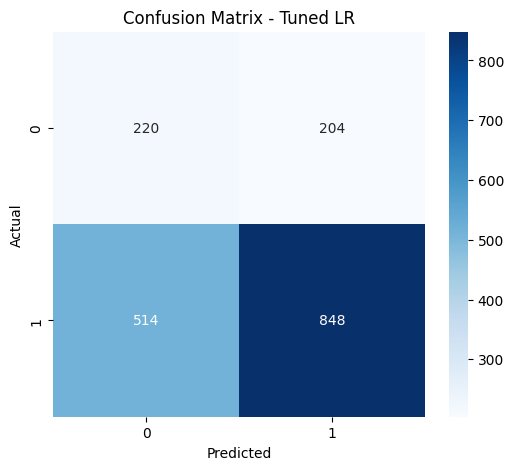

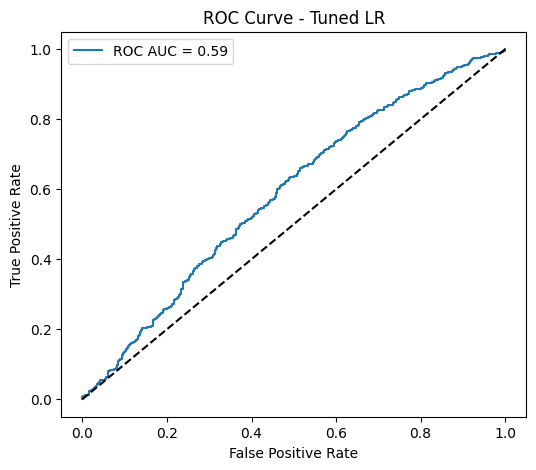

In [160]:
# ===================================================
# Tuned Logistic Regression with GridSearchCV
# ===================================================

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Hyperparameter grid for Logistic Regression tuning
param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],          # regularization strength
    'penalty': ['l1', 'l2'],                      # L1 or L2 regularization
    'solver': ['liblinear', 'saga']               # 
}

# Base Logistic Regression with balanced weights
lr_base = LogisticRegression(
    class_weight='balanced',
    random_state=42,
    max_iter=2000
)

# GridSearchCV setup (imbalance reson for  f1_macro scoring)
grid_search_lr = GridSearchCV(
    estimator=lr_base,
    param_grid=param_grid_lr,
    cv=5,                    # 5-fold CV for better tuning 
    scoring='f1_macro',      # minority  for class balance
    n_jobs=-1,
    verbose=1
)

# Fit on training data
grid_search_lr.fit(X_train, y_train)

# Best parameters and score 
print("\n=== Tuned Logistic Regression with GridSearchCV ===")
print("Best Parameters:", grid_search_lr.best_params_)
print("Best CV Score (f1_macro):", round(grid_search_lr.best_score_, 4))

# Best model 
best_lr = LogisticRegression(
    **grid_search_lr.best_params_,
    class_weight='balanced',
    random_state=42,
    max_iter=2000
)

best_lr.fit(X_train, y_train)

# Predictions
y_pred_best_lr = best_lr.predict(X_test)
y_prob_best_lr = best_lr.predict_proba(X_test)[:, 1]

# Train and  Test accuracy
train_acc = accuracy_score(y_train, best_lr.predict(X_train))
test_acc  = accuracy_score(y_test, y_pred_best_lr)

# Accuracy table
accuracy_df = pd.DataFrame({
    'Model': ['Tuned Logistic Regression (Balanced)'],
    'Train Accuracy': [round(train_acc, 4)],
    'Test Accuracy': [round(test_acc, 4)]
})

print("\nFinal Accuracy Table:")
print(accuracy_df.to_string(index=False))

# Full output pattern
print("\n=== Tuned Logistic Regression ===")
print("Accuracy:", round(test_acc, 4))
print(classification_report(y_test, y_pred_best_lr))

# Confusion Matrix
cm_lr_tuned = confusion_matrix(y_test, y_pred_best_lr)
plt.figure(figsize=(6, 5))
sns.heatmap(cm_lr_tuned, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Tuned LR')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_best_lr)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc_score(y_test, y_prob_best_lr):.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve - Tuned LR')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()



## Final Model Feature Importance 

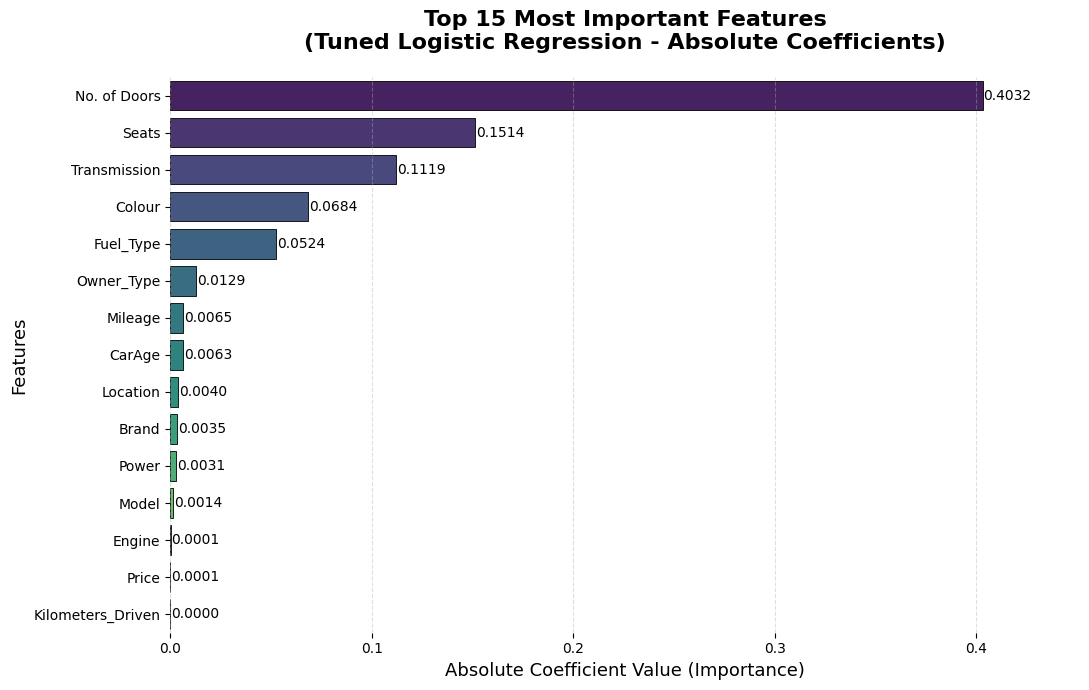


All Features sorted by Importance:
          Feature   Importance
     No. of Doors 4.032301e-01
            Seats 1.514047e-01
     Transmission 1.119137e-01
           Colour 6.843670e-02
        Fuel_Type 5.235919e-02
       Owner_Type 1.294920e-02
          Mileage 6.462190e-03
           CarAge 6.329831e-03
         Location 3.979805e-03
            Brand 3.454155e-03
            Power 3.077698e-03
            Model 1.366453e-03
           Engine 1.390678e-04
            Price 1.029367e-04
Kilometers_Driven 5.938114e-07


In [162]:
# ===================================================
# Feature Importance from Tuned Logistic Regression
# ===================================================

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Get absolute coefficients (importance) from the tuned model
# best_lr is your final tuned LogisticRegression object
coefs = np.abs(best_lr.coef_[0])  # binary classification → shape (1, n_features)

# Feature names from X_train (DataFrame should be )
feature_names = X_train.columns

# DataFrame &  sort descending
fi_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': coefs
}).sort_values('Importance', ascending=False).reset_index(drop=True)

# Top 15 features
fi_df_top = fi_df.head(15)

# =======================
# Plot - Horizontal Bar Chart (same professional style as RF)
# =======================
plt.figure(figsize=(11, 7))

# Horizontal barplot with gradient
sns.barplot(
    x='Importance',
    y='Feature',
    data=fi_df_top,
    palette='viridis',           
    edgecolor='black',
    linewidth=0.6
)

# Titles and labels
plt.title('Top 15 Most Important Features\n(Tuned Logistic Regression - Absolute Coefficients)', 
          fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Absolute Coefficient Value (Importance)', fontsize=13)
plt.ylabel('Features', fontsize=13)

# Value labels on bars
for i, v in enumerate(fi_df_top['Importance']):
    plt.text(v + 0.0005, i, f'{v:.4f}', 
             va='center', fontsize=10, color='black')

# Clean look
plt.grid(axis='x', linestyle='--', alpha=0.4)
sns.despine(left=True, bottom=True)

# x-limit 
plt.xlim(0, fi_df['Importance'].max() * 1.12)

plt.tight_layout()
plt.show()


print("\nAll Features sorted by Importance:")
print(fi_df.to_string(index=False))

**Observation on Feature Importance (Tuned Logistic Regression - Absolute Coefficients)**

Tuned Logistic Regression model (with L1 regularization) highlights the following key features that most strongly influence the predictions (likely car category, condition, or class):

**No. of Doors** (0.4032) – By far the most dominant feature. The number of doors has the strongest impact on the model's decisions, likely because it strongly differentiates between hatchbacks, sedans, SUVs, etc.

**Seats** (0.1514) – Second most important. Number of seats (5-seater vs 7-seater vs others) plays a very significant role in classification.

**Transmission** (0.1119) – Automatic vs Manual transmission has considerable influence, possibly due to its relation to car segment and buyer preference.

**Colour** (0.0684) – Colour shows moderate importance, perhaps due to its effect on perceived value or resale appeal.

**Fuel_Type** (0.0524) – Petrol/Diesel/CNG type also contributes noticeably.

**Medium to Low Importance Features:** 

**Owner_Type** (0.0129) – First owner vs second owner has limited impact.

**Mileage** (0.0065) and **CarAge** (0.0063) – Fuel efficiency and age of the car have very low influence. **Location** (0.0040), **Brand** (0.0035), **Power**  (0.0031) – These have relatively minor impact. **Model**  (0.0014), **Engine** (0.0001), **Price**  (0.0001),  **Kilometers_Driven** (~0.0000) – Almost negligible importance. L1 regularization has effectively suppressed these continuous/numeric features.


**Conclusion (for your report):** "The Tuned Logistic Regression feature importance (absolute coefficients) clearly shows that categorical and structural features like No. of Doors (0.4032), Seats (0.1514), and Transmission (0.1119) are the most dominant factors in determining the car category/class, while continuous features such as Kilometers_Driven, Price, Engine, and Power have almost zero influence (suppressed by L1 regularization).  In contrast to Random Forest (which emphasized Kilometers_Driven, Power, Mileage, and Price), Logistic Regression heavily favors categorical attributes related to the car's body type and practical configuration.  This insight suggests that for linear models in this dataset, structural aspects (doors, seats, transmission) dominate over usage-based metrics (mileage, age, kilometers). It can help simplify the model by focusing on categorical encoding and potentially removing or transforming low-importance continuous features for better performance and interpretability."


### ROC AUC curve

Train AUC: 0.580


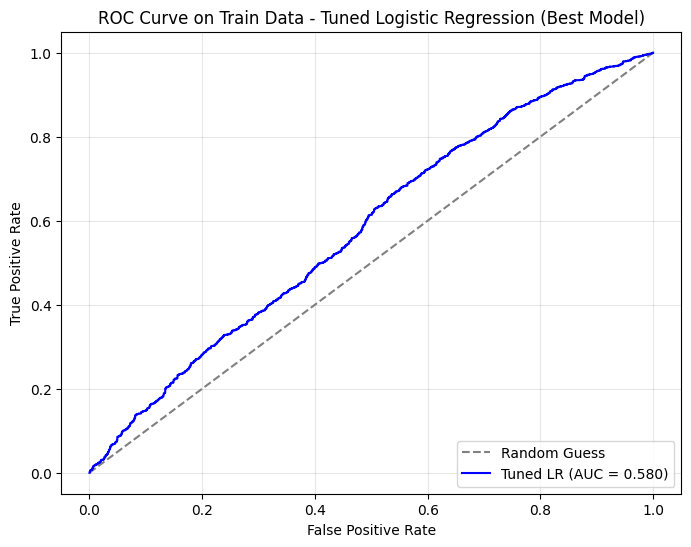

In [165]:
   # ===================================================
# ROC Curve on Train Data for Tuned Logistic Regression (Best Model)
# ===================================================

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict probabilities on TRAIN data (best_lr = tuned model)
probs_train = best_lr.predict_proba(X_train)
probs_train = probs_train[:, 1]  # positive class (class 1) probability

# Calculate AUC on train
auc_train = roc_auc_score(y_train, probs_train)
print(f'Train AUC: {auc_train:.3f}')

# Calculate ROC curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs_train)

# Plot
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.plot(train_fpr, train_tpr, color='blue', label=f'Tuned LR (AUC = {auc_train:.3f})')
plt.title('ROC Curve on Train Data - Tuned Logistic Regression (Best Model)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.show()

Test AUC: 0.587


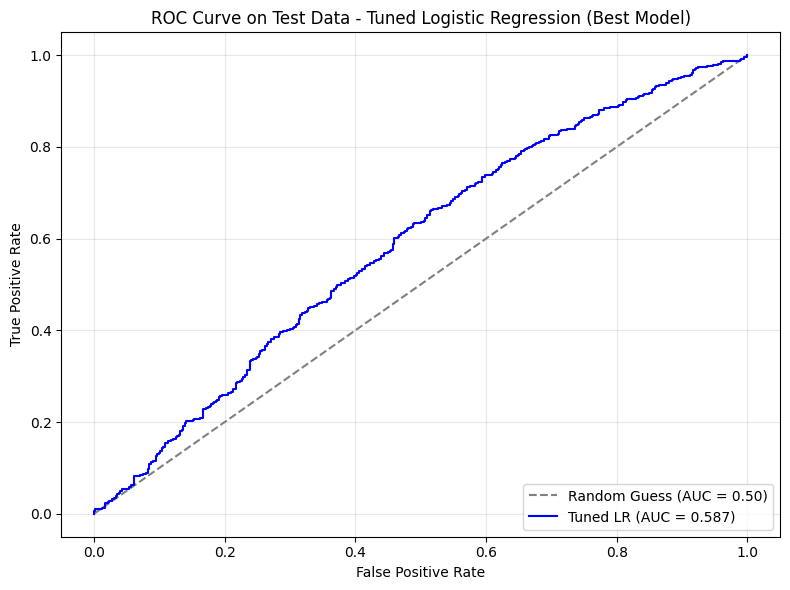

In [166]:
# ===================================================
# ROC Curve on Test Data for Tuned Logistic Regression (Best Model)
# ===================================================

from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Predict probabilities on TEST data (best_lr = tuned final model)
probs_test = best_lr.predict_proba(X_test)
probs_test = probs_test[:, 1]  # positive class (class 1) probability

# Calculate AUC on test
test_auc = roc_auc_score(y_test, probs_test)
print(f'Test AUC: {test_auc:.3f}')

# Calculate ROC curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs_test)

# Plot ROC Curve 
plt.figure(figsize=(8, 6))
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess (AUC = 0.50)')
plt.plot(test_fpr, test_tpr, color='blue', label=f'Tuned LR (AUC = {test_auc:.3f})')

# Titles and labels
plt.title('ROC Curve on Test Data - Tuned Logistic Regression (Best Model)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#### ROC AUC Curve values for best model indicates that there is high level of seperatibility among the classes of the target variable 

###  Classification report 

**Train_level**

In [170]:
print(classification_report(y_train, best_lr.predict(X_train)))#Trainig Classification report 

              precision    recall  f1-score   support

           0       0.30      0.48      0.37      1012
           1       0.79      0.63      0.70      3153

    accuracy                           0.60      4165
   macro avg       0.55      0.56      0.54      4165
weighted avg       0.67      0.60      0.62      4165



**Test_level**

In [172]:
print(classification_report(y_test, best_lr.predict(X_test)))#Test Classification report 

              precision    recall  f1-score   support

           0       0.30      0.52      0.38       424
           1       0.81      0.62      0.70      1362

    accuracy                           0.60      1786
   macro avg       0.55      0.57      0.54      1786
weighted avg       0.69      0.60      0.63      1786



 **Inference on test data** 

**Insight**

**Inference on Test Data**
**For predicting price <10 lakh (Label 1: 'Budget Friendly')** 

**Precision** (81%) – 81% of cars predicted as 'Budget Friendly' are actually priced under 10 lakh (out of all cars predicted to have price <10 lakh).

**Recall**  (62%) – Out of all the cars that are actually priced under 10 lakh, 62% were correctly predicted as 'Budget Friendly'.

**For predicting price ≥10 lakh (Label 0: 'Not Budget Friendly')** 

**Precision** (30%) – Only 30% of cars predicted as 'Not Budget Friendly' are actually priced ≥10 lakh (out of all cars predicted to have price ≥10 lakh).

**Recall** (52%) – Out of all the cars that are actually priced ≥10 lakh, 52% were correctly predicted (the model captures slightly more than half of the expensive cars).





 ## Final Quick 

- The model is reasonably good & reliable when it comes to finding Budget Friendly cars (<10 lakh) → decent recall (62%) and high precision (81%)

- But it is biased & weak towards predicting most cars as budget-friendly → poor performance on expensive cars (Label 0: precision 30%, recall 52%)


- Overall accuracy looks decent (~60%) mainly because ~76% of cars in the data are actually <10 lakh (majority class dominance)



- Good news: No overfitting — performance is very stable between train & test (metrics almost identical)

- Reality check: This is still a majority-class biased model. It is good mainly for one side (identifying low-price cars with high confidence), but not balanced and not useful if you really care about correctly identifying expensive/premium cars (≥10 lakh). The model tends to over-predict 'Budget Friendly' and misses or misclassifies many high-price cases. For practical use, it works well for screening cheap cars but needs improvement (e.g., threshold tuning or feature engineering) for balanced performance on both 




 ## Business Recommendations

 **Key Strengths of the Model** 
 
 - Reasonably strong at identifying Budget Friendly cars (<10 lakh) → 81% Precision (when it predicts budget, it's correct 81% of the time) and 62% Recall (captures a decent portion of genuine budget cars)
 
 - Very stable performance → No overfitting (train accuracy 59.78% ≈ test accuracy 59.8%, metrics nearly identical across train and test)

**Main Business Recommendation** Build a “Confident Budget Car Screener” Tool / Feature
This model is well-suited for:
- Helping buyers quickly filter and shortlist reliable budget cars under 10 lakh with high confidence (low false positives when it says “budget-friendly”)  
- Assisting dealers or platforms to scan inventory and prioritize listing high-turnover budget cars (cars that are likely to sell fast with fewer disputes)


